In [220]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
warnings.filterwarnings("ignore")

In [221]:
data = pd.read_csv('Walmart_Sales10.csv', low_memory=False)
data.head()


,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code,Unnamed: 23
0,Stevens Point,60.0,Dennis Bolton,Corporate,0.17,29-02-2020,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7.0,0.55,...,19559.92268,Central,21.84,02-03-2020,Delivery Truck,3.772509354,Wisconsin,3.29,54481.0,NaN
1,Stevens Point,60.0,Dennis Bolton,Corporate,0.17,29-02-2020,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7.0,0.55,...,19559.92268,Central,1811.67,07-03-2020,Delivery Truck,816.3408935,Wisconsin,258.98,54481.0,NaN
2,Grapevine,49.0,Anthony Garverick,Small Business,0.05,11-11-2021,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42.0,0.69,...,7535.9388,Central,6129.06,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0,NaN
3,Tempe,30.0,Anne McFarland,Consumer,0.05,02-08-2020,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30.0,0.37,...,18860.92419,West,198.9,08-08-2020,Regular Air,128.7315052,Arizona,6.68,85281.0,NaN
4,Coconut Creek,80.0,Raymond Fair,Home Office,0.14,13-08-2021,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44.0,\N,...,24750.4921,South,1875.28,18-08-2021,Express Air,33.60838488,Florida,42.76,33063.0,NaN


In [222]:
data.shape

(10012, 24)

In [223]:
data.describe()

,customer_age,discount,order_quantity,zip_code,Unnamed: 23
count,9966.000000,9966.000000,9966.000000,9966.000000,152.000000
mean,54.912603,0.124970,25.659843,46180.574358,46156.750000
std,20.440608,0.072094,14.197054,31292.280970,32230.202397
min,20.000000,0.000000,1.000000,2.080000,1462.000000
25%,37.000000,0.060000,13.000000,16146.000000,14719.500000
50%,55.000000,0.120000,26.000000,46321.000000,44479.000000
75%,73.000000,0.190000,38.000000,75098.000000,76114.750000
max,90.000000,0.250000,50.000000,99362.000000,99352.000000


In [224]:
data1 =data.drop(columns=['Unnamed: 23'], axis=1)

In [225]:
df_no_nulls = data1.dropna()

# Take a random sample of 5000 records from the cleaned dataset
data1 = df_no_nulls.sample(n=5000, random_state=42)  # Set random_state for reproducibility
data1.shape

(5000, 23)

In [226]:
data1.head().T

,4228,5880,3071,744,7532
city,Farragut,Moreno Valley,Summit,Grants Pass,Murrieta
customer_age,46.0,70.0,74.0,40.0,82.0
customer_name,Andrew Gjertsen,Shaun Weien,Deanra Eno,Guy Armstrong,Michelle Lonsdale
customer_segment,Small Business,Small Business,Small Business,Small Business,Corporate
discount,0.07,0.14,0.11,0.16,0.17
order_date,31-10-2019,06-09-2019,07-02-2019,08-08-2021,13-10-2019
order_id,2528235c-1c99-40c1-86a3-226405db1c91,4d638eb8-d064-4a61-be34-0b6ff790a4b9,fe6bef9e-bb88-4b27-9fb8-ea9da3b8c921,61fac45f-c018-4695-91a9-c134d9c398d2,6294a4aa-bcf1-4769-8112-1341f8264502
order_priority,High,High,Medium,Not Specified,Medium
order_quantity,10.0,3.0,1.0,39.0,50.0
product_base_margin,0.36,0.62,0.55,0.49,0.59


In [227]:
data1.isna().sum()

city                    0
customer_age            0
customer_name           0
customer_segment        0
discount                0
order_date              0
order_id                0
order_priority          0
order_quantity          0
product_base_margin     0
product_category        0
product_container       0
product_name            0
product_sub_category    0
profit                  0
region                  0
sales                   0
ship_date               0
ship_mode               0
shipping_cost           0
state                   0
unit_price              0
zip_code                0
dtype: int64

In [228]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 4228 to 8551
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  5000 non-null   object 
 1   customer_age          5000 non-null   float64
 2   customer_name         5000 non-null   object 
 3   customer_segment      5000 non-null   object 
 4   discount              5000 non-null   float64
 5   order_date            5000 non-null   object 
 6   order_id              5000 non-null   object 
 7   order_priority        5000 non-null   object 
 8   order_quantity        5000 non-null   float64
 9   product_base_margin   5000 non-null   object 
 10  product_category      5000 non-null   object 
 11  product_container     5000 non-null   object 
 12  product_name          5000 non-null   object 
 13  product_sub_category  5000 non-null   object 
 14  profit                5000 non-null   object 
 15  region                5

In [229]:
data1_unique= data1['customer_name'].nunique()
data1_unique

784

In [230]:
# Sort data by customer name  and order date..it can be used in customer segmentation to analyze purchase pattern over time
cus_orderquantity = data1.groupby('customer_name')['order_quantity'].sum().sort_values()
cus_orderquantity


customer_name
Fred Wasserman      7.0
Ralph Kennedy      24.0
Andy Reiter        26.0
Pauline Chand      29.0
Julia West         31.0
                  ...  
Trudy Schmidt     381.0
Chuck Clark       400.0
Frank Atkinson    401.0
Beth Fritzler     422.0
Tom Zandusky      437.0
Name: order_quantity, Length: 784, dtype: float64

In [231]:
# Calculate days since last order for each customer to know the churn customer
#data1['days_since_last_order'] = data1.groupby('customer_name')['order_date'].diff().dt.days
#data1.head()

In [232]:
#creating churn column

# Sort data by customer and order date
data1['order_date'] = pd.to_datetime(data1['order_date'], format='%d-%m-%Y')

data1 = data1.sort_values(by=['customer_name', 'order_date'])

# Calculate days since last order for each customer
data1['days_since_last_order'] = data1.groupby('customer_name')['order_date'].transform(lambda x: x.diff().dt.days)

# Replace NaN for customers with only one order_date using the difference from the max order_date
max_order_date = data1['order_date'].max()
data1['days_since_last_order'].fillna((max_order_date - data1['order_date']).dt.days, inplace=True)

# Define a churn threshold (e.g., 180 days)
churn_threshold = 180

# Create the Churn column
data1['Churn'] = data1['days_since_last_order'].apply(lambda x: 1 if x > churn_threshold else 0)

# Fill NaN values (e.g., for the first order of each customer) with 0 (not churned)
data1['Churn'] = data1['Churn'].fillna(0).astype(int)

# View the result
print(data1[['customer_name', 'order_date', 'days_since_last_order', 'Churn']])

       customer_name order_date  days_since_last_order  Churn
9949   Aaron Bergman 2019-04-12                 1366.0      1
259    Aaron Bergman 2019-05-03                   21.0      0
4465   Aaron Bergman 2019-09-20                  140.0      0
302    Aaron Bergman 2020-04-17                  210.0      1
2421   Aaron Bergman 2020-05-12                   25.0      0
...              ...        ...                    ...    ...
9779  Yoseph Carroll 2019-05-28                 1320.0      1
8306  Yoseph Carroll 2019-09-09                  104.0      0
9028  Yoseph Carroll 2019-11-01                   53.0      0
693   Yoseph Carroll 2019-11-19                   18.0      0
1627  Yoseph Carroll 2021-07-03                  592.0      1

[5000 rows x 4 columns]


In [233]:
data1.isnull().sum()

city                     0
customer_age             0
customer_name            0
customer_segment         0
discount                 0
order_date               0
order_id                 0
order_priority           0
order_quantity           0
product_base_margin      0
product_category         0
product_container        0
product_name             0
product_sub_category     0
profit                   0
region                   0
sales                    0
ship_date                0
ship_mode                0
shipping_cost            0
state                    0
unit_price               0
zip_code                 0
days_since_last_order    0
Churn                    0
dtype: int64

In [234]:
data1.duplicated().sum()

0

In [235]:
data_unique = data1['order_id'].nunique()
data_unique

5000

### Data Cleaning

In [236]:
data1['product_base_margin'].unique()

array(['0.72', '0.69', '0.57', '0.8', '0.36', '0.43', '0.38', '0.56',
       '0.4', '0.58', '0.37', '0.47', '0.65', '0.51', '0.62', '0.73',
       '0.52', '0.74', '0.64', '0.49', '0.55', '0.35', '0.42', '0.77',
       '0.85', '0.44', '0.39', '0.41', '0.67', '0.5', '0.59', '0.63',
       '0.71', '0.46', '0.6', '0.48', '0.54', '0.81', '0.61', '0.7',
       '\\N', '0.66', '0.75', '0.79', '0.78', '0.68', '0.53', '0.76',
       '0.83', '0.45', '0.82', '0.84'], dtype=object)

In [237]:
data1.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'days_since_last_order', 'Churn'],
      dtype='object')

In [238]:
#checking for uniques values
data1.nunique()

city                     1380
customer_age               71
customer_name             784
customer_segment            4
discount                   26
order_date               1421
order_id                 5000
order_priority              5
order_quantity             50
product_base_margin        52
product_category            4
product_container           8
product_name             1231
product_sub_category       18
profit                   4827
region                     86
sales                    4629
ship_date                1500
ship_mode                  83
shipping_cost            4909
state                     129
unit_price                752
zip_code                 1389
days_since_last_order    1079
Churn                       2
dtype: int64

In [239]:
# cleaning columns with \\N values
data1['product_category'] = data1['product_category'].replace('\\N', 'Others')

# for product_base_margin, because the count of '\\N' is 52, we can replace with zero. This will not affect our dataset.
data1[data1['product_base_margin'] == '\\N']['product_base_margin'].count()
data1['product_base_margin'] = data1['product_base_margin'].replace('\\N', 0)

# for product_container
data1['product_container'] = data1['product_container'].replace('\\N', 'Others')

# product_sub_category
data1['product_sub_category'] = data1['product_sub_category'].replace('\\N', 'Others')

# Replace incorrect numeric entries in the region column with unknown
data1['region'] = data1['region'].apply(lambda x: x if x in ['Central', 'South', 'East', 'West'] else 
                                         (str(data1['sales']).split()[0] if str(data1['sales']).split()[0].isalpha() else 'Unknown'))


data1['profit'] = data1['profit'].apply(lambda x: x if x.strip() != 'Rulers and Trimmers' else '0')



def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

data1['sales'] = data1['sales'].apply(lambda x: x if is_float(x) else np.nan)

data1['shipping_cost'] = data1['shipping_cost'].apply(lambda x: x if is_float(x) else np.nan)

data1['unit_price'] = data1['unit_price'].apply(lambda x: x if is_float(x) else np.nan)

data1 = data1.dropna()


In [240]:
# Converting columns with false datatypes to correct datatypes
data1['ship_date'] = pd.to_datetime(data1['ship_date'], format='%d-%m-%Y', errors='coerce')
data1['product_base_margin'] = data1['product_base_margin'].astype(float)
data1['profit'] = data1['profit'].astype((float),errors='raise')
data1['sales'] = data1['sales'].astype(float)
data1['shipping_cost'] = data1['shipping_cost'].astype(float)
data1['unit_price'] = data1['unit_price'].astype(float)

In [241]:
# creating new column for profit

data1['profit_per_sale'] = data1['order_quantity'] * data1['product_base_margin']

In [242]:
data1.isna().sum()

city                     0
customer_age             0
customer_name            0
customer_segment         0
discount                 0
order_date               0
order_id                 0
order_priority           0
order_quantity           0
product_base_margin      0
product_category         0
product_container        0
product_name             0
product_sub_category     0
profit                   0
region                   0
sales                    0
ship_date                0
ship_mode                0
shipping_cost            0
state                    0
unit_price               0
zip_code                 0
days_since_last_order    0
Churn                    0
profit_per_sale          0
dtype: int64

### Exploratory Data Analysis

In [243]:
#Checking for numeric columns
num_cols = data1.select_dtypes(include=['number']).shape[1]
num_cols

12

In [244]:
data1['city']

9949        Lakeville
259            Tupelo
4465        Texarkana
302      Port Chester
2421       Perry Hall
            ...      
9779      Little Rock
8306        Davenport
9028    Brooklyn Park
693        Greensboro
1627     Douglasville
Name: city, Length: 4905, dtype: object

In [245]:
#Checking for categorical columns
data1.select_dtypes(exclude=['number']).columns

Index(['city', 'customer_name', 'customer_segment', 'order_date', 'order_id',
       'order_priority', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'region', 'ship_date',
       'ship_mode', 'state'],
      dtype='object')

starting...


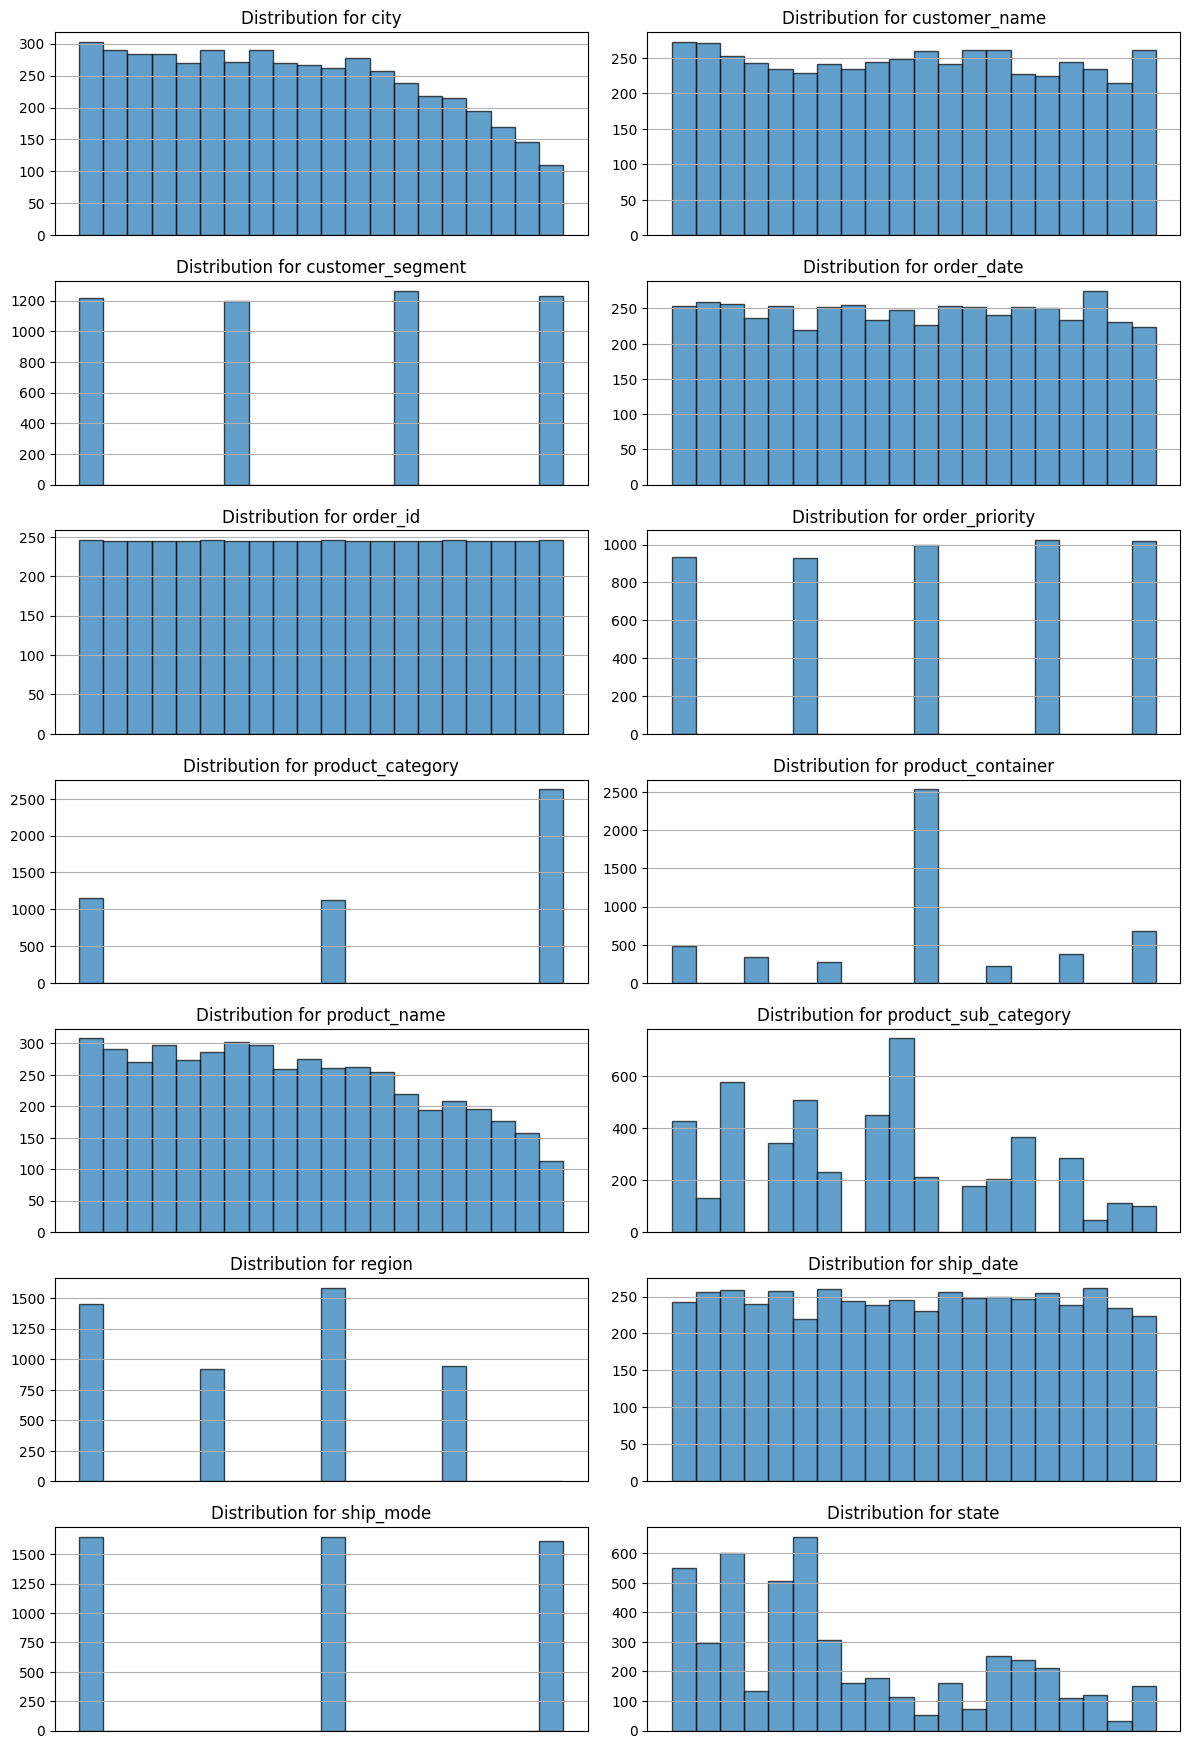

In [246]:
#showing distribution of all the categorical columns
%matplotlib inline
cat_columns = data1.select_dtypes(exclude=['number']).columns
# cat_columns = ['city', ]

print('starting...')

plt.figure(figsize=(12, 20))
for i, feature in enumerate(cat_columns, 1):
    plt.subplot((len(cat_columns) // 2) + 1, 2, i)  # Adjust rows dynamically
    data1[feature].hist(bins=20, edgecolor='black', alpha=0.7)  # Using pandas' hist method
    plt.title(f"Distribution for {feature}")
    plt.xticks([])

    plt.tight_layout()

plt.show()
    


This shows the distribution of the data accross the categorical columns, some are uniformly and semi uniformly distributed while others are not.it reveals the balance and imbalanced distribution of the categorical features
showing how some categories has significant spread of data points than others

starting...


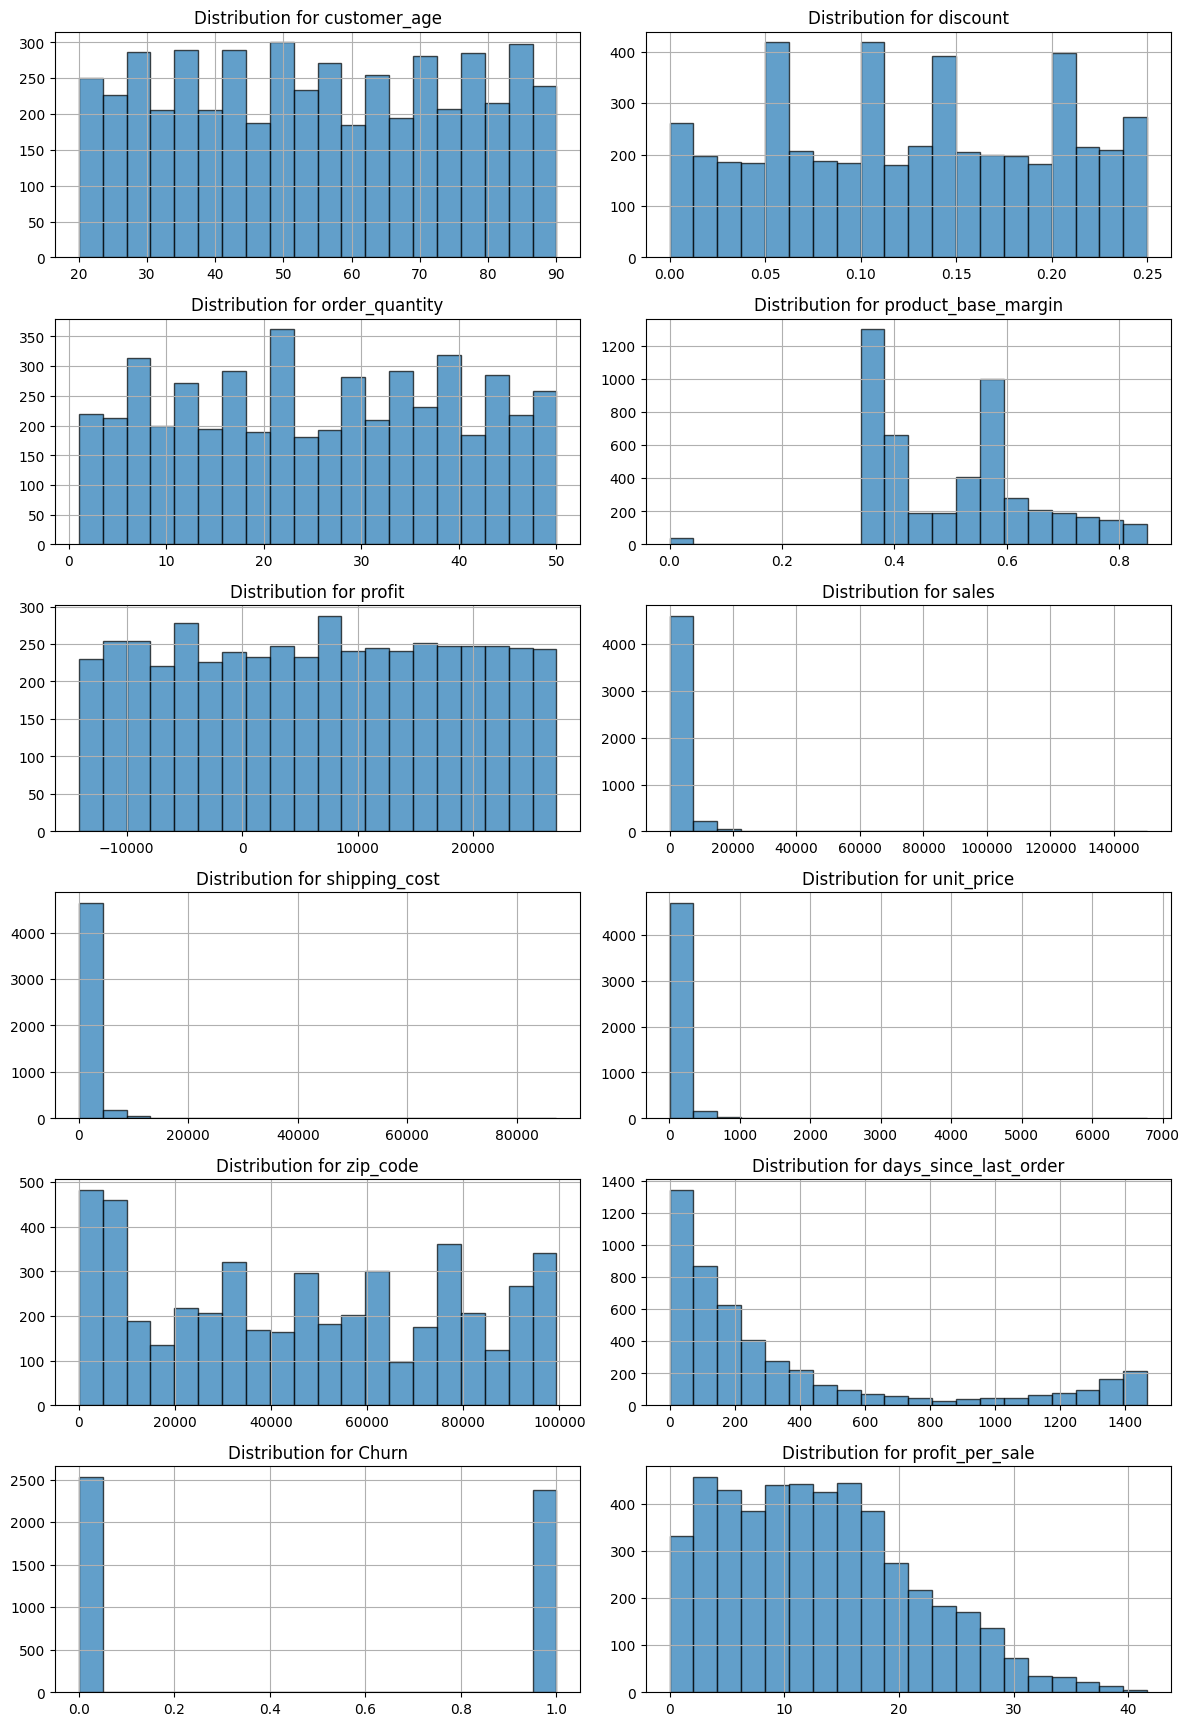

In [247]:
#showing distribution of all the numeric columns
%matplotlib inline
num_columns = data1.select_dtypes(include=['number']).columns
# cat_columns = ['city', ]the categorical featur

print('starting...')

plt.figure(figsize=(12, 20))
for i, feature in enumerate(num_columns, 1):
    plt.subplot((len(num_columns) // 2) + 1, 2, i)  # Adjust rows dynamically
    data1[feature].hist(bins=20, edgecolor='black', alpha=0.7)  # Using pandas' hist method
    plt.title(f"Distribution for {feature}")
    plt.xticks()

    plt.tight_layout()

plt.show()
    

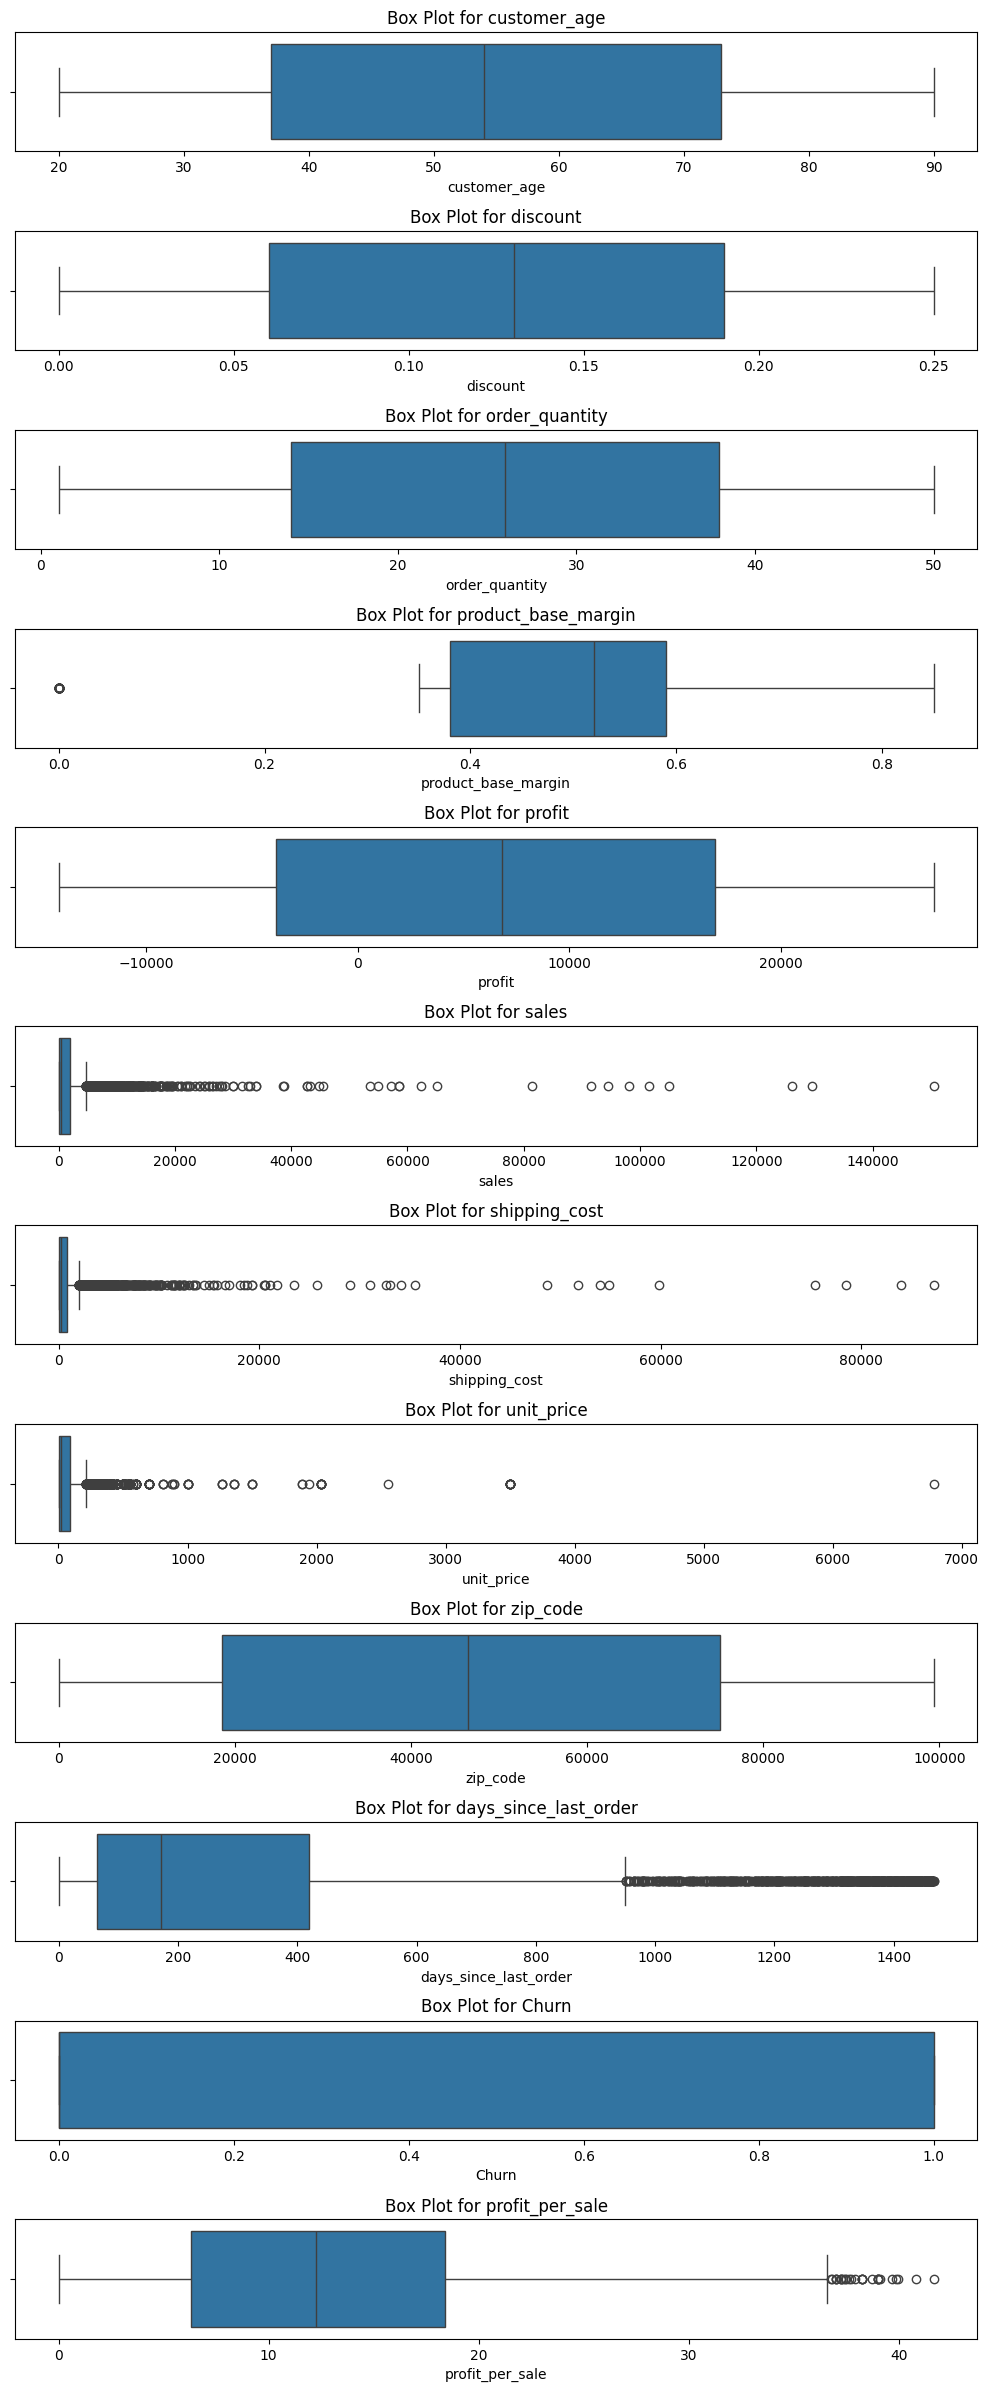

In [248]:
# Select only numeric columns
#num_columns = data1.select_dtypes(include=[np.number]).columns

# Set up the plotting area with a smaller figure size
plt.figure(figsize=(10, len(num_columns) * 2))
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)  # Create a subplot for each numeric column
    sns.boxplot(data=data1, x=col)  # Removed 'palette' to avoid warning
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout(pad=1)  # Reduce padding between subplots
plt.show()


In [249]:
#top product sub category with order quantity
top_products = data1.groupby(['order_id','product_sub_category'])['order_quantity'].sum().sort_values(ascending=False).reset_index()
top_products.head(10)

,order_id,product_sub_category,order_quantity
0,d62684d0-dbc6-4569-8f17-34cba3a1f235,Bookcases,50.0
1,55ee300f-b150-40c1-9ea6-acaabedd4c8d,Computer Peripherals,50.0
2,da72cfb4-7735-4af9-87c0-cc1511359303,Tables,50.0
3,6b97b59f-7efc-4234-b776-ddf328bec8ed,Storage & Organization,50.0
4,48c9dafc-4d7c-4c39-892f-b205a8d052ac,Computer Peripherals,50.0
5,83ea9f3c-2ebf-4dcf-a565-3caa7dd20279,Appliances,50.0
6,56bd03a1-9f6b-44d3-a750-3b1de06560ee,Office Furnishings,50.0
7,14c99071-8b2f-40dc-bb5c-22a0fcb6182f,Telephones and Communication,50.0
8,51f0de15-6959-417f-b122-4b5481debbbd,Paper,50.0
9,bd773562-deb7-4324-a4e9-d15da5b35ebd,Chairs & Chairmats,50.0


In [250]:
#state with the most sales
sales_per_state = data1.groupby('state')['sales'].sum().sort_values(ascending=False).reset_index()
sales_per_state.head(10)

,state,sales
0,Texas,926742.82
1,California,717128.86
2,New Jersey,707554.76
3,Florida,695191.04
4,MA,684619.95
5,Illinois,618991.19
6,Minnesota,452563.05
7,Washington,380938.72
8,New York,370342.25
9,Ohio,346423.06


In [251]:
#checking for most profitable state
profit_state = data1.groupby('state')['profit'].sum().sort_values(ascending=False).reset_index()
profit_state.head(10)

,state,profit
0,Texas,2.903168e+06
1,MA,2.200628e+06
2,California,2.166472e+06
3,New Jersey,1.877536e+06
4,Illinois,1.547154e+06
5,New York,1.391414e+06
6,Florida,1.302063e+06
7,Ohio,1.267251e+06
8,Pennsylvania,1.073632e+06
9,Minnesota,1.064827e+06


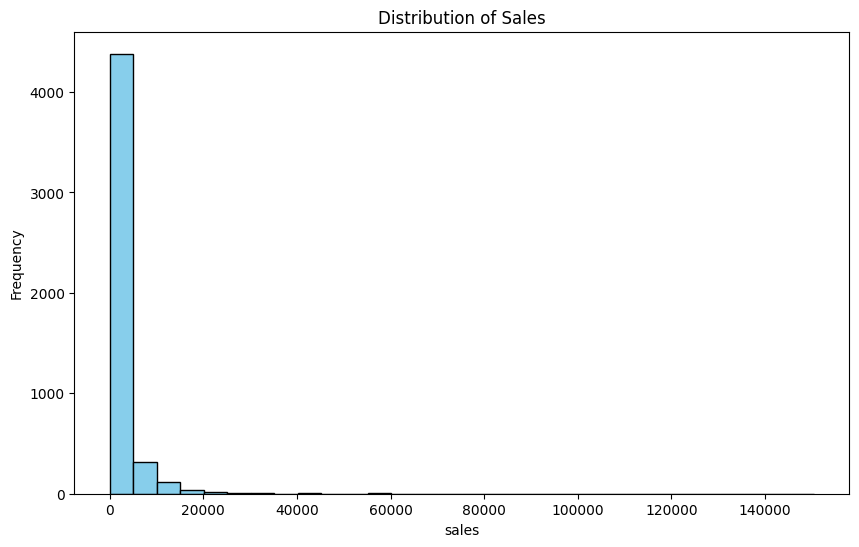

In [252]:
#histogram to visualize sales distribution
plt.figure(figsize=(10, 6))
plt.hist(data1['sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.show()

The sales distribution plot appears to be unimodal. This means it has a single peak, indicating that most of the sales are concentrated around 0 - 6000. the peak is towards the lower end of the sales range, suggesting that a majority of transactions are for smaller amounts.
so here there is no Customers with higher sales values than 6000 which might have different needs and preferences than those with lower sales.
This distribution can also inform Walmart inventory management decisions. If the most sales are from smaller items, inventory level will be  optimize accordingly.
Recommendation is to tailor marketing strategies on retaining high-value customers or  The company restrategize to increase sales among lower-value customers.

Average Sales: 2182.2240978593272


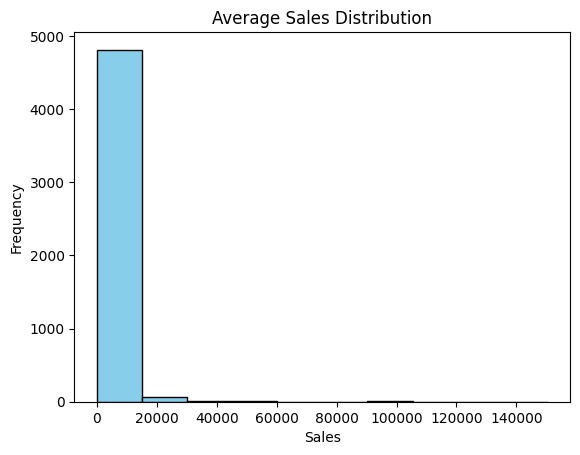

In [253]:

# Calculate average sales
average_sales = data1['sales'].mean()
print("Average Sales:", average_sales)

# Create a histogram to visualize the distribution
plt.hist(data1['sales'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Average Sales Distribution')
plt.show()

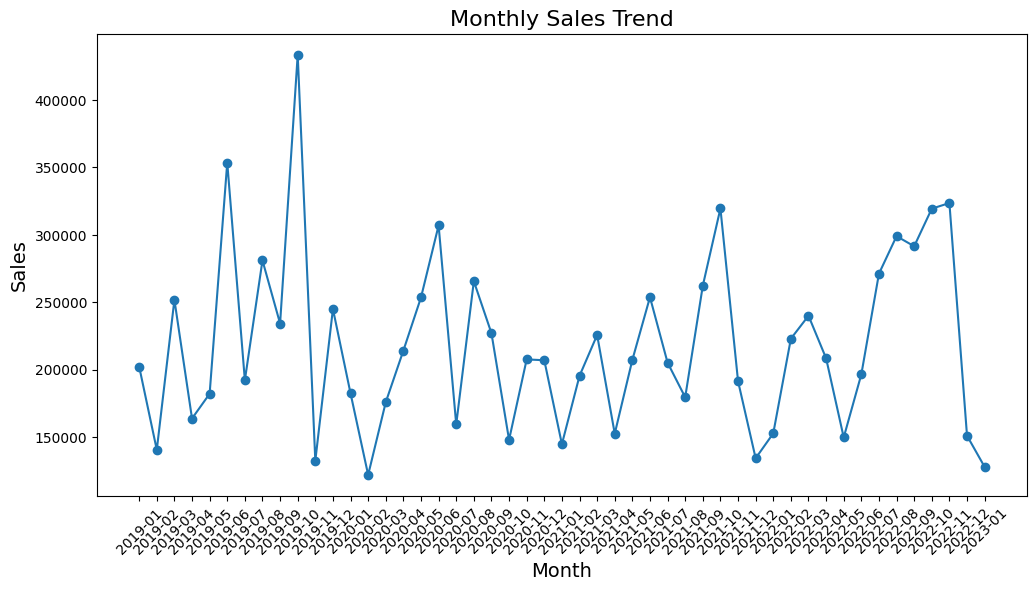

In [254]:
#yearly-monthly sales trend
# Extract year-month for grouping
data1['Year-Month'] = data1['order_date'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = data1.groupby('Year-Month')['sales'].sum().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


This line plot visualize seasonal trends and growth in sales over time. it is able to show monthly trend of sales over five years,2019-2023 indicating a spike in sales between 07-2019 t0 10-2019 and a deep in sales between 11- 2019 to 02-2020, which might as result of covid 19. low sales  and some fluctuation of high sales run through  the rest of the  years. it showed specific months with high and low sales.
Recommendations: 
Walmart can plan for promotion during low-sales months, make good stock inventory for peak seasons and may investigate reasons behind anomalies like sudden sales spikes or drops


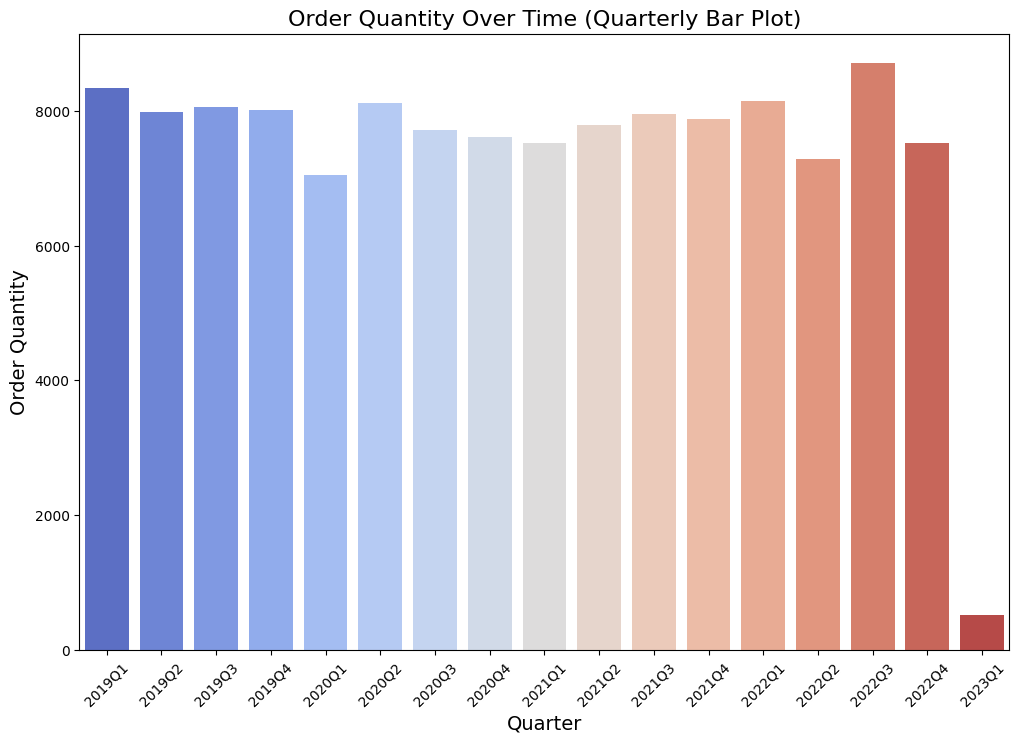

In [255]:
# Order quantity over time by quarterly
data1['Year-Quarter'] = data1['order_date'].dt.to_period('Q')

# Aggregate sales by quarter
quarterly_sales = data1.groupby('Year-Quarter')['order_quantity'].sum().reset_index()

# Convert 'Year-Quarter' to string for plotting
quarterly_sales['Year-Quarter'] = quarterly_sales['Year-Quarter'].astype(str)

# Plot the quarterly sales trend as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Year-Quarter', 
    y='order_quantity', 
    data=quarterly_sales, 
    palette='coolwarm'
)

plt.title('Order Quantity Over Time (Quarterly Bar Plot)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Order Quantity', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


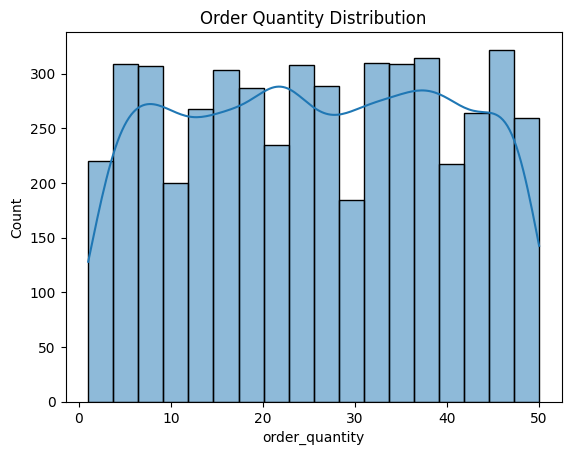

In [256]:
#Order Quantity Distribution
sns.histplot(data1['order_quantity'], kde=True)
plt.title('Order Quantity Distribution')
plt.show()


The order quantity distribution shows a unimodal distribution with a peak around the 10-20 order quantity range. this indicated that customers were 
not placing more big orders. this also indicated that they orders did not reflect high value customers.
Recommendation: marketing strategies should be made to target  high value customers

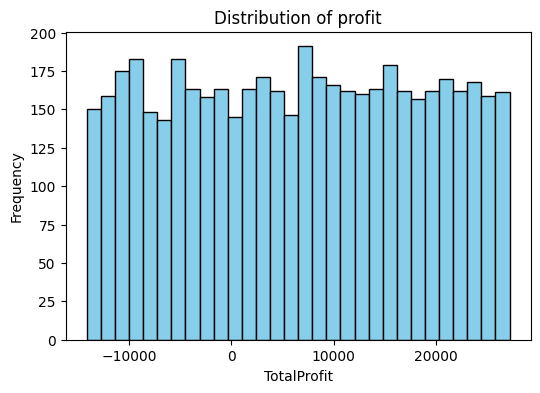

In [257]:
#visualizing profit distribution
plt.figure(figsize=(6, 4))
plt.hist(data1['profit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of profit')
plt.xlabel('TotalProfit')
plt.ylabel('Frequency')
plt.show()

The plot shows a relatively uniform distribution of profits, which means that transactions are spread out across a wide range of total prices, with no significant peaks or valleys. Although there is a notable observation of the presence of negative profits, indicating that some transactions resulted in losses. This could be due to various factors such as discounts, return products, or operational costs

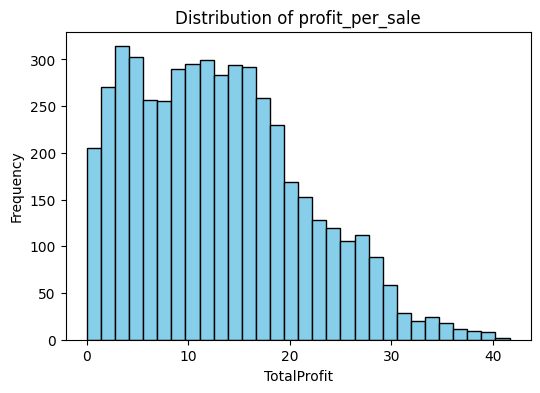

In [258]:
#visualizing profit distribution
plt.figure(figsize=(6, 4))
plt.hist(data1['profit_per_sale'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of profit_per_sale')
plt.xlabel('TotalProfit')
plt.ylabel('Frequency')
plt.show()

The profit_per_sale distribution plot is right-skewed, this means that most of the profits per sale are 
concentrated on the lower end, with a few instances of very high profits.
The distribution is relatively wide which indicates a fair amount of variation in profit per sale. 
There are both low-profit and high-profit sales.
The chart suggests that while most sales generate moderate profits, there are a few instances of very high-profit sales,
likely from specific product categories or customer segments.

Recommendations:
Company could use this information to Identify profitable products or customer segments and optimizing sales strategies 
accordingly.

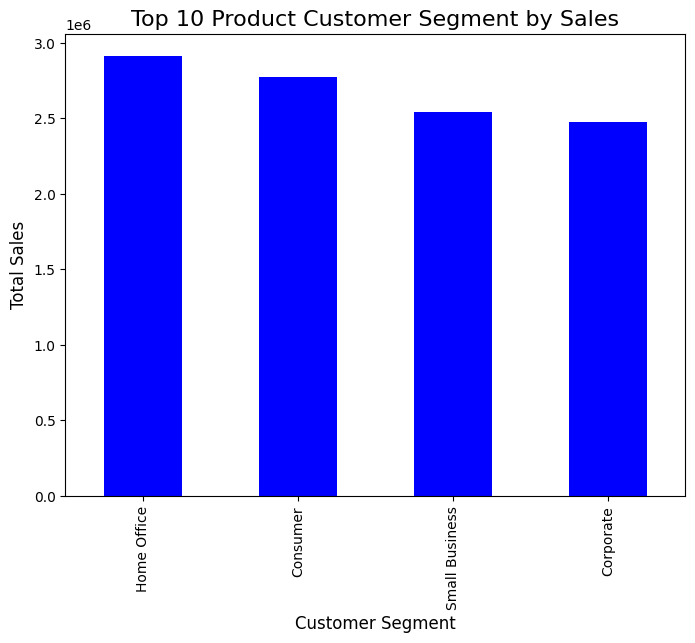

In [259]:
#10 top performing product customer Segment by sales
top_categories = data1.groupby('customer_segment')['sales'].sum().sort_values(ascending=False).head(10)

# Plot the data as a bar plot
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Customer Segment by Sales', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.xticks(rotation=90)
plt.show()

This plot reveals customer segment like consumer, home Office who consistently generate positive profits and 
they can be classified as high-value customers, while those who frequently lead to losses can be flagged for 
further marketing strategies to be followed, 
they may be classified as price sensitive customers who may be more likely to purchase at lower price points, 
while less price-sensitive customers may be willing to pay higher prices.

 ### Data Aggregation:

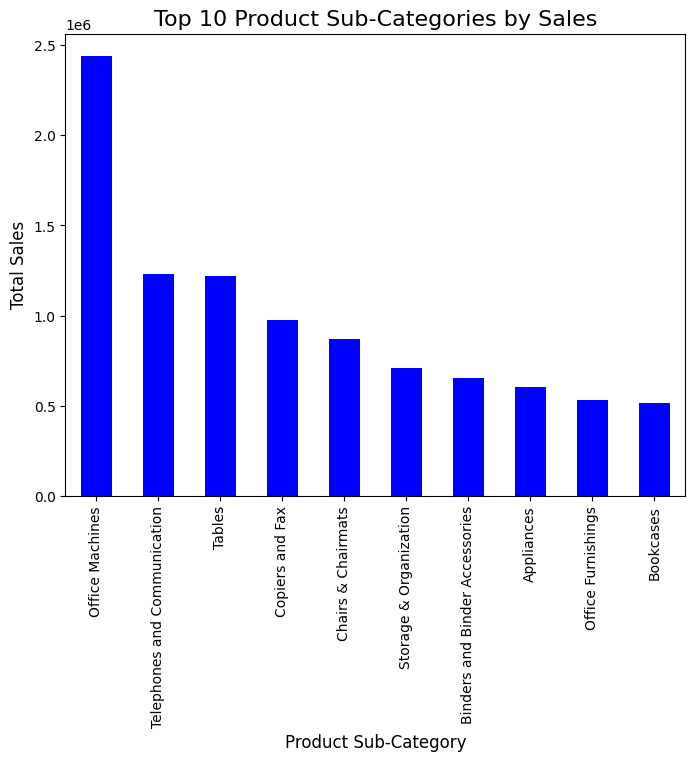

In [260]:
#10 top performing product sub-categories by sales
top_categories = data1.groupby('product_sub_category')['sales'].sum().sort_values(ascending=False).head(10)

# Plot the data as a bar plot
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Sub-Categories by Sales', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.xticks(rotation=90)
#plt.grid(axis='y',  alpha=0.7)
plt.show()


Top 10 sub product categories which revealed the most popular or profitable product lines like office furnishing e.g printers, scanners, copiers, and other electronic devices, bookcases, papers etc. this will help the company create segments based on customers preferences for these sub-categories and personalized marketing campaigns
High value customers who frequently purchase from these top product subcategories products are identified which likely contributes to the overall revenue. 

Recommendations:

These high valued customers can be segmented and targeted with loyalty programs and exclusive offers.
customers buying from these top sub-categories may have different purchase frequencies which may be tailored to getting frequent promotions and occasional buyers can get reminders. this will contribute to the overall sales/revenue.
customers purchasing from this product subcategories might also be interested in related products, common parings can be identified and targeted with cross-sell offers.
The company can also consider bundling complementary products within the same sub-category or across different sub-categories to increase average order value and customer satisfaction!


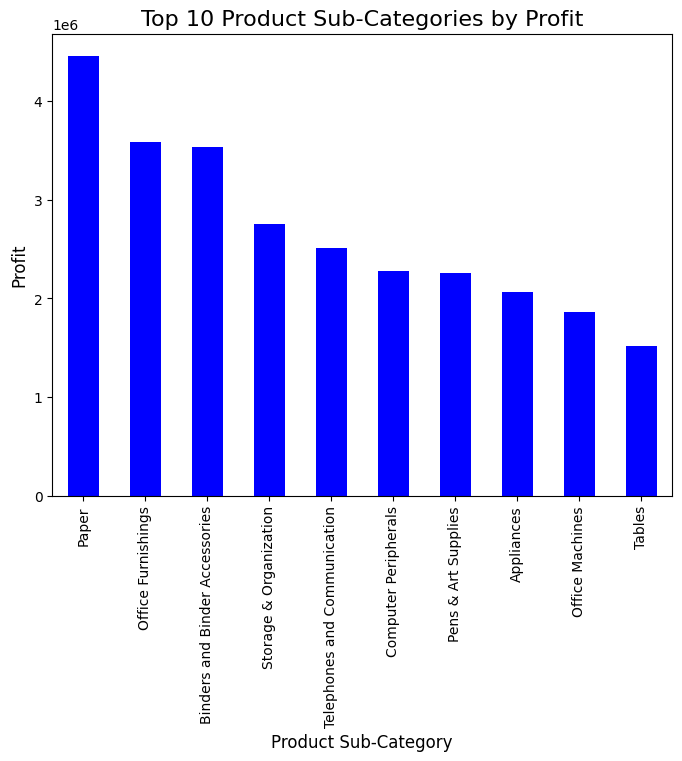

In [261]:
#10 top performing product sub-categories by sales
top_categories = data1.groupby('product_sub_category')['profit'].sum().sort_values(ascending=False).head(10)

# Plot the data as a bar plot
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Sub-Categories by Profit', fontsize=16)
plt.ylabel('Profit', fontsize=12)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.xticks(rotation=90)
#plt.grid(axis='y',  alpha=0.7)
plt.show()

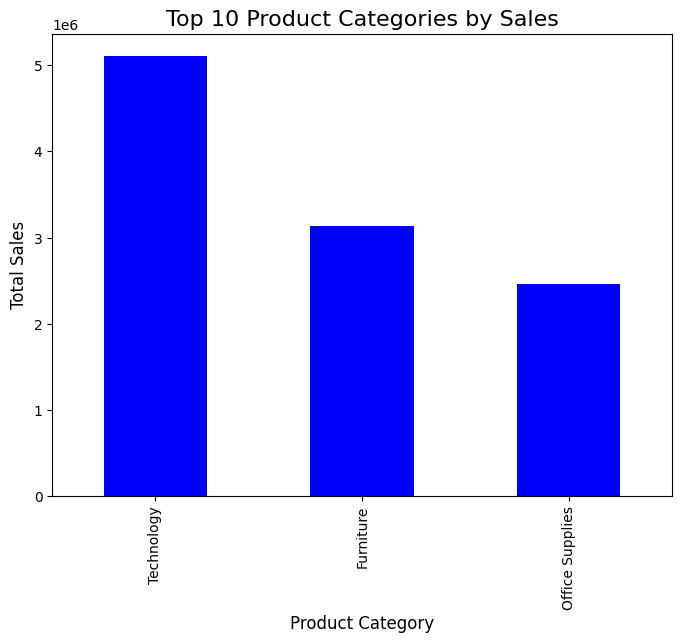

In [262]:
#10 top performing product categorY by sales
top_categories = data1.groupby('product_category')['sales'].sum().sort_values(ascending=False).head(10)

# Plot the data as a bar plot
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Categories by Sales', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=90)
#plt.grid(axis='y',  alpha=0.5)
plt.show()

Technology leading in sales, significantly outperforming the other categories.

Recommendations: Look out for opportunities to further boost sales in the Technology category like involving targeted marketing campaigns, product expansion, or partnerships with relevant brands.
While these categories are not performing well as the technology product category, the company can consider strategies like product diversification, competitive pricing, or innovative marketing campaigns to increase sales in these categories.


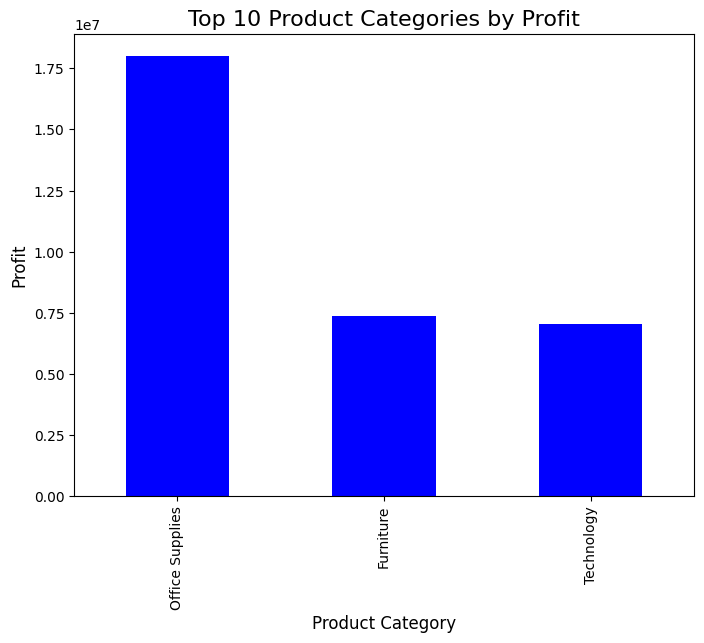

In [263]:
#10 top performing product category by profit
top_categories = data1.groupby('product_category')['profit'].sum().sort_values(ascending=False).head(10)

# Plot the data as a bar plot
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Categories by Profit', fontsize=16)
plt.ylabel('Profit', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=90)
#plt.grid(axis='y',  alpha=0.5)
plt.show()

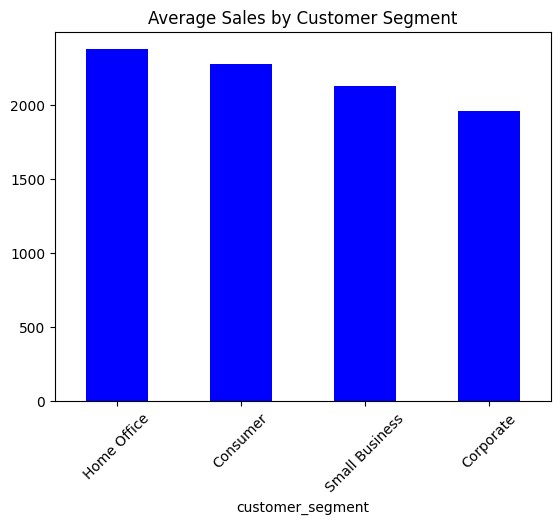

In [264]:
#Average sales by customer segment
segment_sales = data1.groupby('customer_segment')['sales'].mean().sort_values(ascending=False)
segment_sales.plot(kind='bar',  color='blue', title='Average Sales by Customer Segment')
plt.xticks(rotation=45)
plt.show()


Comparing  the spending behavior across different customer segments.
Home Office segment has the highest average sales compared to other segments. This suggests that customers in this segment may purchase more expensive products or place larger orders.Focus should be on retaining and nurturing these high-value customers with loyalty programs, exclusive offers, and premium experiences.

Also, marketing campaign should be tailored on Home Office segment as high value group,  factors driving this higher sales should be replicated as strategies for other segments.
    
other segments with low sales should be targeted with promotions, bundle deals, or loyalty programs to encourage larger purchases and close the gap with other segments.

Recommendations:
Average sales can highlight differences across regions, age groups, or income levels.Customize regional or demographic-specific campaigns to align with spending behaviors.


In [265]:
#order date with the highest sales
highest_monthly_sale = data1.groupby('order_date')['sales'].sum().sort_values(ascending=False).head(1)
highest_monthly_sale

order_date
2022-11-15    175625.6
Name: sales, dtype: float64

In [266]:
#product name per unit_price
average_unit_price_per_product = data1.groupby(['order_id','product_name'])['unit_price'].mean().sort_values(ascending=False).reset_index()
average_unit_price_per_product

,order_id,product_name,unit_price
0,dea969d5-b7c8-4184-bc54-2bd94b3c8a52,Polycom ViewStation ISDN Videoconferencing Unit,6783.02
1,41292c41-2814-4826-bec7-c4e3d8b9d5f1,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
2,0523a31d-5d3d-48fd-9b6a-a22ee4311a1e,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
3,fa4c0d03-0882-4115-8a28-b2b0d34a69ad,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
4,2ec3ba10-83d5-46b5-b193-9c62265fc99e,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
...,...,...,...
4900,d2491cc7-8d09-4aff-babc-26f912239852,Bagged Rubber Bands,1.26
4901,10ecf0ea-8806-4165-b05a-760b5f9fcd9d,Bagged Rubber Bands,1.26
4902,0d47687e-cb58-42b7-bb3c-1876840adc18,OIC Thumb-Tacks,1.14
4903,457b97c1-b545-423c-bef0-03ffb2753c16,Sony IBM Color Diskettes 25/Pack,0.99


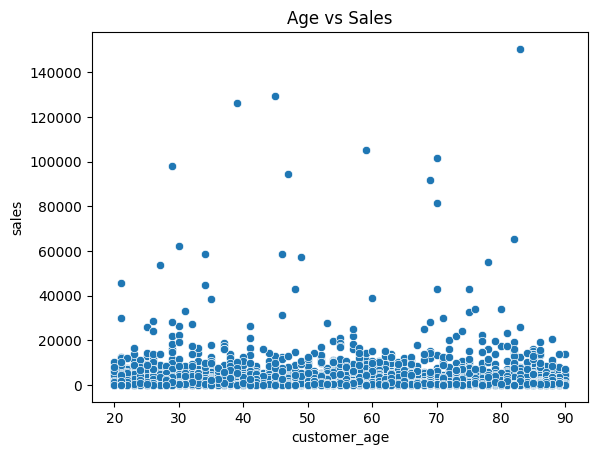

In [267]:
#determine relationship between customer age and sales
sns.scatterplot(x='customer_age', y='sales', data=data1)
plt.title('Age vs Sales')
plt.show()


This plot doesn't show any linear relationship between customer age and sales. The data points are scattered across a wide range of ages without a clear upward or downward trend. This suggests that age alone may not be a significant factor in determining sales.

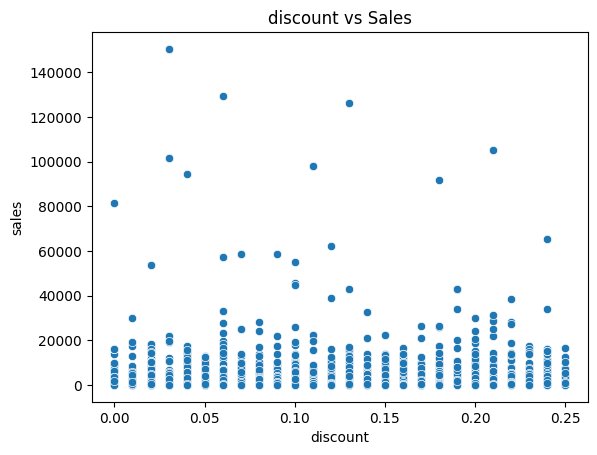

In [268]:
sns.scatterplot(x='discount', y='sales', data=data1)
plt.title('discount vs Sales')
plt.show()

There isn't a clear, strong, linear relationship between discount and sales. While there are some instances where higher discounts correlate with higher sales, there are also many cases where lower discounts lead to higher sales. This suggests that the relationship is not straightforward.


In [269]:
filtered_discount = data1[data1['discount'] < 0.05]

filtered_discount.sort_values(by='sales', ascending=False).head().T

,3095,7949,8440,6511,8298
city,Carson City,Lodi,Oklahoma City,Rockville,Longview
customer_age,83.0,70.0,47.0,70.0,27.0
customer_name,Bill Tyler,Brendan Murry,William Brown,Doug Jacobs,Alex Grayson
customer_segment,Consumer,Corporate,Consumer,Home Office,Consumer
discount,0.03,0.03,0.04,0.0,0.02
order_date,2022-10-17 00:00:00,2019-09-01 00:00:00,2020-06-26 00:00:00,2022-09-02 00:00:00,2022-07-29 00:00:00
order_id,d3e6df0d-2342-481a-834d-c6be76846d4d,0523a31d-5d3d-48fd-9b6a-a22ee4311a1e,41292c41-2814-4826-bec7-c4e3d8b9d5f1,dbdf206a-bff1-4b25-b6f1-72544ed1a4be,3b78b848-53b4-46a1-a2fb-0d60d95aeecb
order_priority,Not Specified,Low,Not Specified,Low,Not Specified
order_quantity,43.0,29.0,27.0,42.0,21.0
product_base_margin,0.37,0.57,0.57,0.38,0.57


In [270]:
filtered_discount = data1[data1['discount'] > 0.20]

filtered_discount.sort_values(by='sales', ascending=False).head().T

,7486,6672,6435,1300,7629
city,Hurst,Waukesha,Minnetonka Mills,Walker,Hilton Head Island
customer_age,59.0,82.0,35.0,80.0,46.0
customer_name,Liz Thompson,Liz Pelletier,Harry Marie,John Castell,Paul Lucas
customer_segment,Home Office,Home Office,Home Office,Consumer,Corporate
discount,0.21,0.24,0.22,0.24,0.21
order_date,2019-10-01 00:00:00,2021-09-14 00:00:00,2019-10-14 00:00:00,2019-06-28 00:00:00,2020-08-02 00:00:00
order_id,3e611408-09bd-4cdf-8b33-9c54f74a2755,3644e6e3-575f-4ff1-8c55-754416ac3340,938caf09-b3b3-4601-afc6-2c3755795b99,d4e4411d-4d7d-41a6-924b-3dc6eda6e3ff,425b684e-e319-499b-8d16-958477b834e1
order_priority,Low,Low,Not Specified,Critical,Low
order_quantity,30.0,32.0,43.0,18.0,45.0
product_base_margin,0.57,0.55,0.38,0.36,0.54


Here i made a comparative analysis of the discount and sales  and discovered that less discount were given to larger  unit price product
while large discount were given to small unit price products. this whis why the plot is showing high discount at low sales. which this might mean that the company 
preferred to get more sales from the smaller unit price products to increase the profit margin while the larger unit price, the company already 
generate good profit margin from them 

it was also discovered that the main profit column was not a true representation of the profit the company made, it look as if it was 
an accumulated record of profit for some couple of days or weeks , but not for a day sales.

Top Products by Total Sales:
                                          product_name      sales
786  Okidata Pacemark 4410N Wide Format Dot Matrix ...  525304.99
295              Canon imageCLASS 2200 Advanced Copier  353493.54
669               Lexmark 4227 Plus Dot Matrix Printer  344136.35
286                 Canon Imageclass D680 Copier / Fax  127364.59
783            Okidata ML395C Color Dot Matrix Printer  118321.89


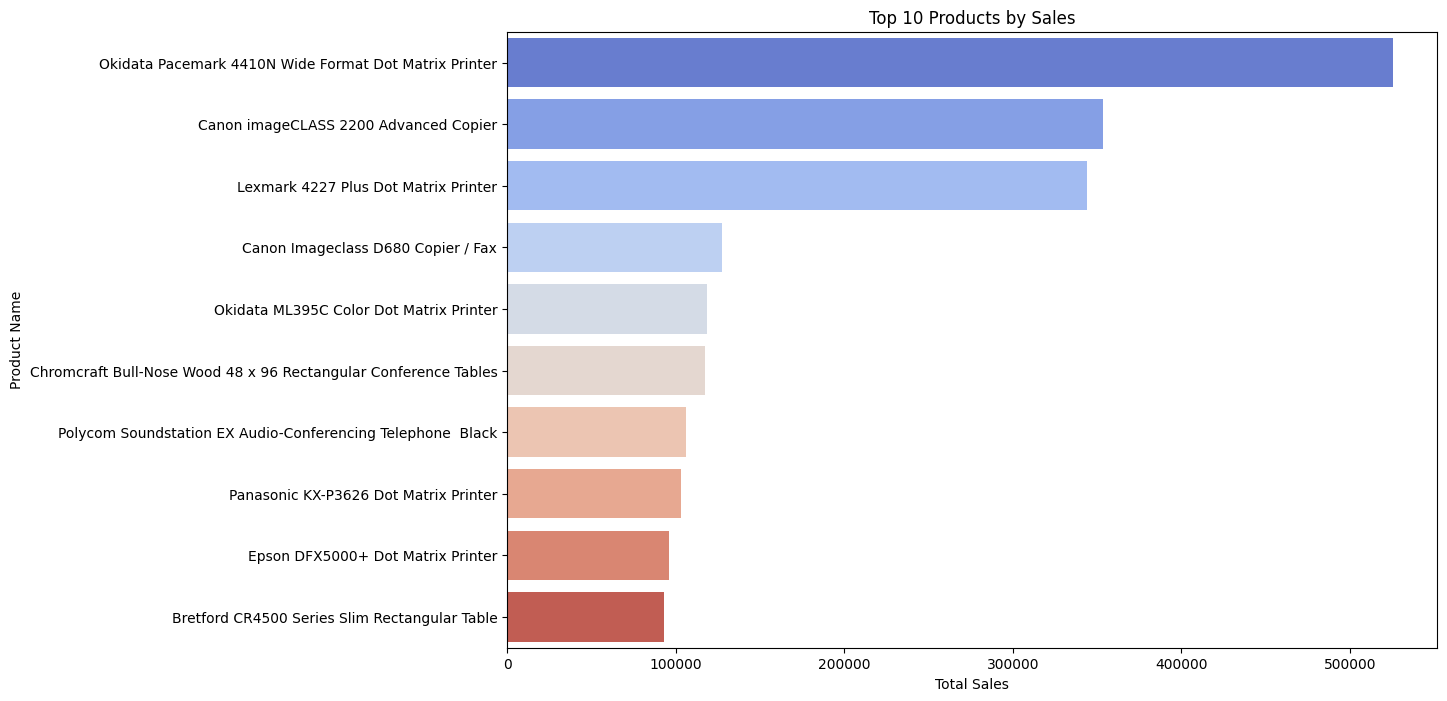

In [271]:
# Top selling Product, Group by product_name and sum the sales
product_sales = data1.groupby('product_name')['sales'].sum().reset_index()

# Sort the products by total sales in descending order
product_sales = product_sales.sort_values(by='sales', ascending=False)

# Display the product with the highest sales
print("Top Products by Total Sales:")
print(product_sales.head())

# Visualize the top 10 products by sales
plt.figure(figsize=(12, 8))
sns.barplot(x='sales', y='product_name', data=product_sales.head(10), palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

This bar chart shows 10 products was being sold the most, which the most sold product was Okidata Pacemark 4410N Wide Format Dot Matrix ...  525304.99


Top Product subcategory by Total Sales:
            product_sub_category       sales
9                Office Machines  2441474.98
15  Telephones and Communication  1230033.21
14                        Tables  1218897.24
5                Copiers and Fax   974595.31
3             Chairs & Chairmats   867126.24


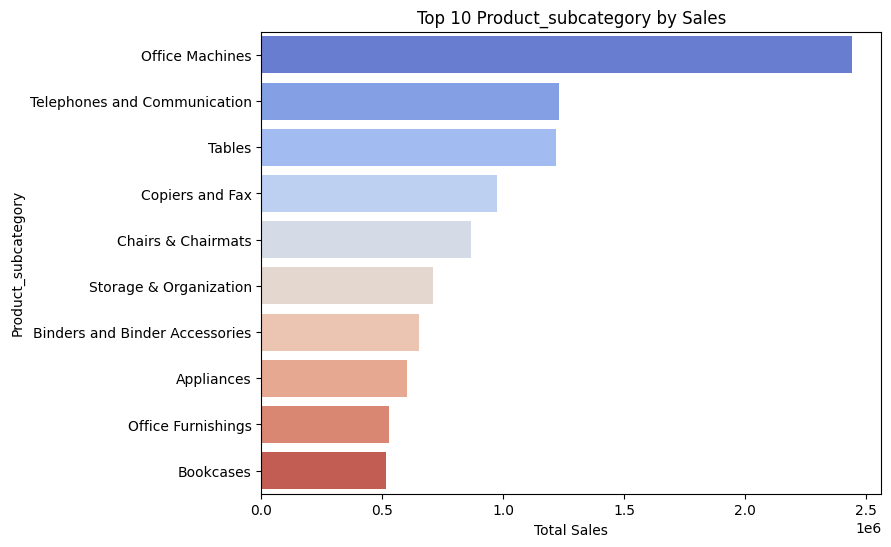

In [272]:
# product sub category with high sales
product_sales = data1.groupby('product_sub_category')['sales'].sum().reset_index()

# Sort the products by total sales in descending order
product_sales = product_sales.sort_values(by='sales', ascending=False)

# Display the product with the highest sales
print("Top Product subcategory by Total Sales:")
print(product_sales.head())

# Visualize the top 10 products by sales
plt.figure(figsize=(8, 6))
sns.barplot(x='sales', y='product_sub_category', data=product_sales.head(10), palette='coolwarm')
plt.title('Top 10 Product_subcategory by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product_subcategory')
plt.show()

This bar chart shows 10 products sub category that was sold the most, which the most sold product sub category was Office Machine

In [273]:
data1.groupby('product_sub_category')[['sales', 'profit']].sum().sort_values(by=['sales', 'profit'], ascending=False)

,sales,profit
product_sub_category,,
Office Machines,2441474.98,1.867033e+06
Telephones and Communication,1230033.21,2.510919e+06
Tables,1218897.24,1.514902e+06
Copiers and Fax,974595.31,3.740341e+05
Chairs & Chairmats,867126.24,1.438825e+06
Storage & Organization,708273.48,2.757786e+06
Binders and Binder Accessories,650512.79,3.536457e+06
Appliances,603168.94,2.064903e+06
Office Furnishings,528575.72,3.581399e+06


In [274]:
data1.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'days_since_last_order', 'Churn', 'profit_per_sale',
       'Year-Month', 'Year-Quarter'],
      dtype='object')

In [275]:
#drilling in to really see the contribution of difference features on profit
data1[['product_name','discount','profit', 'sales', 'unit_price','order_quantity', 'product_base_margin', 'profit_per_sale']]

,product_name,discount,profit,sales,unit_price,order_quantity,product_base_margin,profit_per_sale
9949,Imation Primaris 3.5 2HD Unformatted Diskettes...,0.22,14257.08551,77.35,4.77,17.0,0.72,12.24
259,O Sullivan Elevations Bookcase Cherry Finish,0.22,4506.67636,3922.80,130.98,30.0,0.69,20.70
4465,Dana Halogen Swing-Arm Architect Lamp,0.01,7354.84722,696.32,40.97,17.0,0.57,9.69
302,Sensible Storage WireTech Storage Systems,0.14,-3037.37926,1771.00,70.98,25.0,0.80,20.00
2421,Acco PRESSTEX Data Binder with Storage Hooks ...,0.20,-2548.89640,103.60,5.38,20.0,0.36,7.20
...,...,...,...,...,...,...,...,...
9779,5170,0.15,-7577.82377,65.84,65.99,1.0,0.59,0.59
8306,Pressboard Covers with Storage Hooks 9 1/2 x ...,0.06,-10594.03542,111.55,4.91,23.0,0.38,8.74
9028,Memorex 80 Minute CD-R 30/Pack,0.02,4386.36929,229.60,22.98,10.0,0.46,4.60
693,Large Capacity Hanging Post Binders,0.23,2756.32682,173.04,24.95,7.0,0.39,2.73


here it was also discovered that the main profit column was not a true representation of the profit the company made, it look as if it was 
an accumulated record of profit for some couple of days or weels , but not for a day sales.

Top Products by Unit Price:
                                          product_name  unit_price
786  Okidata Pacemark 4410N Wide Format Dot Matrix ...    17510.70
669               Lexmark 4227 Plus Dot Matrix Printer    14255.36
295              Canon imageCLASS 2200 Advanced Copier    13999.96
811    Polycom ViewStation ISDN Videoconferencing Unit     6783.02
808  Polycom Soundstation EX Audio-Conferencing Tel...     4999.95


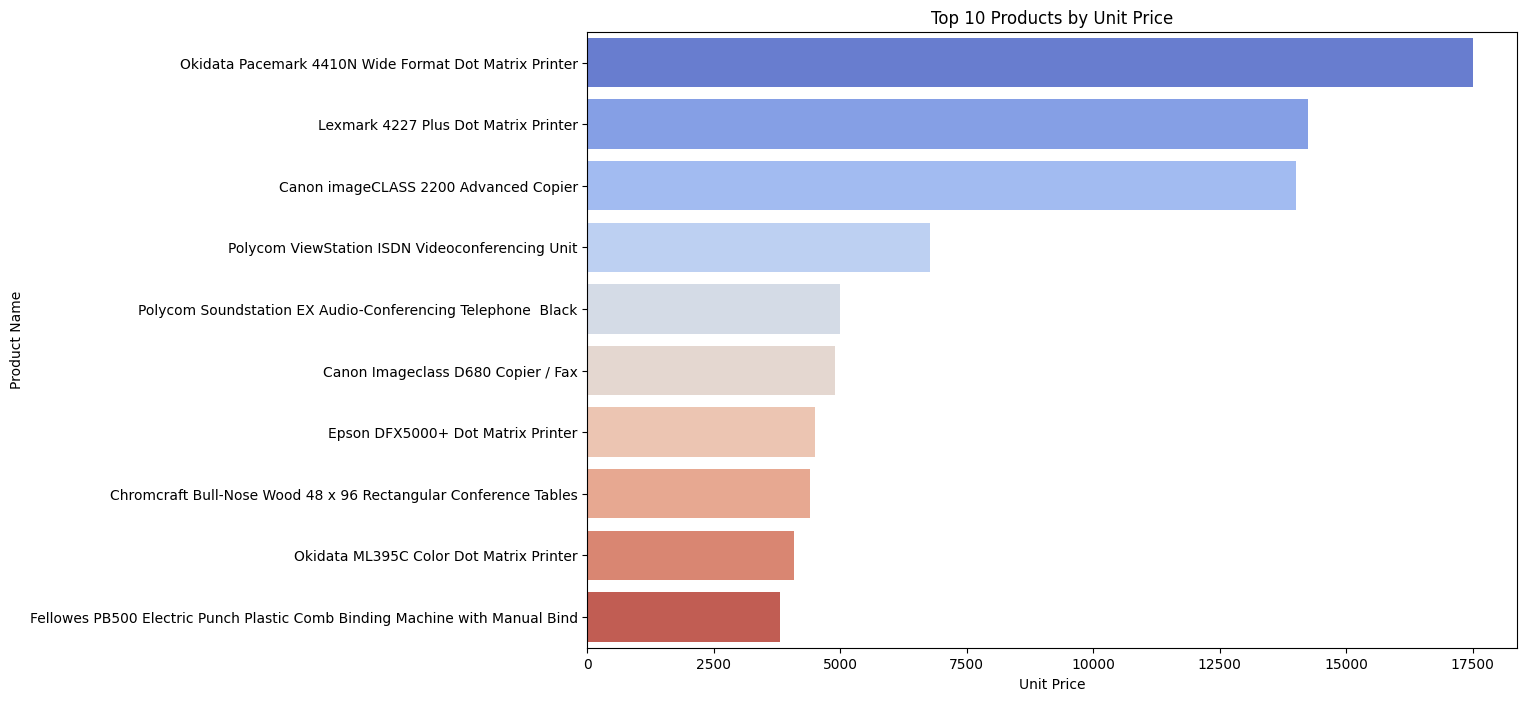

In [276]:
# what product cost the most
product_sales = data1.groupby('product_name')['unit_price'].sum().reset_index()

# Sort the products by total sales in descending order
product_sales = product_sales.sort_values(by='unit_price', ascending=False)

# Display the product with the highest sales
print("Top Products by Unit Price:")
print(product_sales.head())

# Visualize the top 10 products by sales
plt.figure(figsize=(12, 8))
sns.barplot(x='unit_price', y='product_name', data=product_sales.head(10), palette='coolwarm')
plt.title('Top 10 Products by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Product Name')
plt.show()

In this chart there is wide range of unit prices among the top 10 products. This suggests that there is diverse product mix, catering to different customer segments with varying budgets.
High-Value Products significantly  represent  portion of total revenue due to their high unit prices. 

Recommendation
the company should ensure that the pricing strategy for your high-value products aligns with their perceived value and market demand. 
High-value products should be clearly position as premium offerings highlighting their unique features, benefits, and quality to justify the higher price point.
this analysis wil help Identify the customer segments that are willing to pay a premium for Walmart's high-value products and the company can target these segments with specific marketing messages and promotions.
    
A detailed cost analysis can be conducted for your high-value products to identify potential cost-saving opportunities which could help you maintain profitability while optimizing pricing.
Also company should consider bundling high-value products with lower-priced items to create attractive offers and increase overall sales.
Eexceptional customer service should be provided for customers purchasing high-value products to build loyalty and positive brand perception.
    
Walmart should make sure monitoring of inventory levels for high-value products is regular to avoid stockouts and capitalize on sales opportunities

Product Subcategory by Profit:
            product_sub_category  profit_per_sale
8             Office Furnishings          8270.58
10                         Paper          7045.38
15  Telephones and Communication          6975.49
4           Computer Peripherals          6554.08
13        Storage & Organization          5384.49


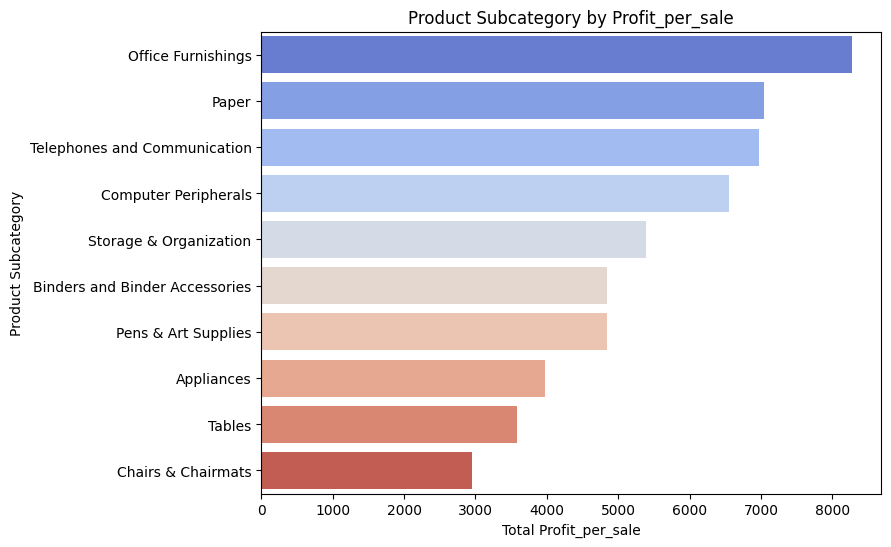

In [277]:
# which product subcategory brought the most profit
product_sales = data1.groupby('product_sub_category')['profit_per_sale'].sum().reset_index()

# Sort the product subcategory by total profit in ascending order
product_sales = product_sales.sort_values(by='profit_per_sale', ascending=False)

# Display the product subcategory with the highest profit
print("Product Subcategory by Profit:")
print(product_sales.head())

# Visualize the top 10 product subcategory by profit
plt.figure(figsize=(8, 6))
sns.barplot(x='profit_per_sale', y='product_sub_category', data=product_sales.head(10), palette='coolwarm')
plt.title('Product Subcategory by Profit_per_sale')
plt.xlabel('Total Profit_per_sale')
plt.ylabel('Product Subcategory')
plt.show()

the top 10 subcategories with the highest total profit.
this plot shows which subcategories are the most profitable overall (based on total margins),
regardless of the number of products.


Product Subcategory by Profit:
  customer_segment  profit_per_sale
1        Corporate         16459.43
0         Consumer         16240.73
2      Home Office         16099.86
3   Small Business         15449.46


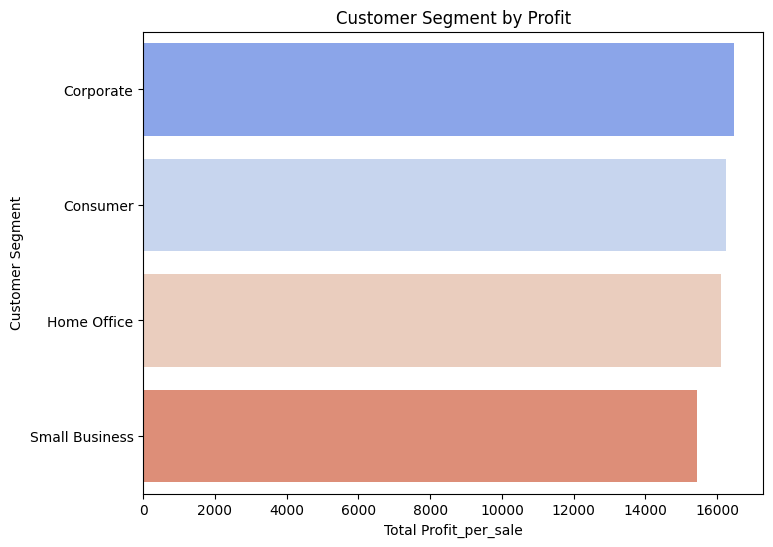

In [278]:
# which product subcategory brought the most profit
product_sales = data1.groupby('customer_segment')['profit_per_sale'].sum().reset_index()

# Sort the product subcategory by total profit in ascending order
product_sales = product_sales.sort_values(by='profit_per_sale', ascending=False)

# Display the product subcategory with the highest profit
print("Product Subcategory by Profit:")
print(product_sales.head())

# Visualize the top 10 product subcategory by profit
plt.figure(figsize=(8, 6))
sns.barplot(x='profit_per_sale', y='customer_segment', data=product_sales.head(10), palette='coolwarm')
plt.title('Customer Segment by Profit')
plt.xlabel('Total Profit_per_sale')
plt.ylabel('Customer Segment')
plt.show()

Order quantity by region:
    region  order_quantity
1     East         40880.0
0  Central         37655.0
4     West         23935.0
2    South         23604.0
3  Unknown           124.0


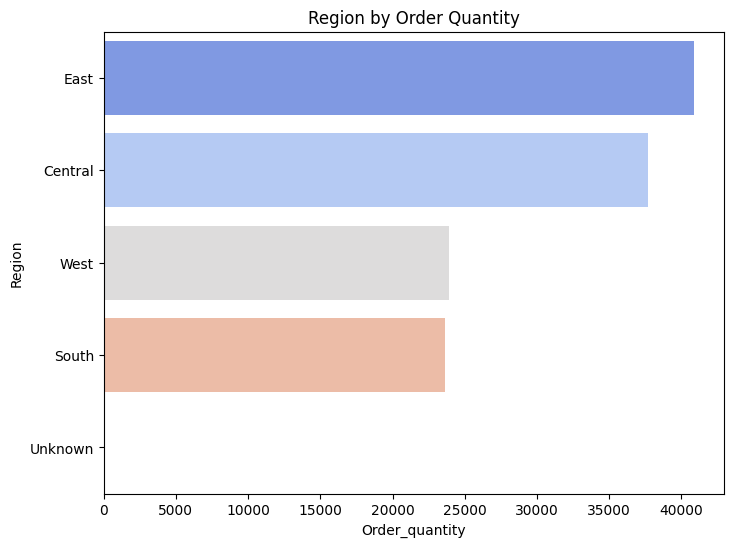

In [279]:
#  Order quantity by Region,  Group by region and sum of order_quantity
product_sales = data1.groupby('region')['order_quantity'].sum().reset_index()

# Sort the products by total sales in descending order
product_sales = product_sales.sort_values(by='order_quantity', ascending=False)

# Display the product with the highest sales
print("Order quantity by region:")
print(product_sales.head())

# Visualize the top 10 products by sales
plt.figure(figsize=(8, 6))
sns.barplot(x='order_quantity', y='region', data=product_sales.head(10), palette='coolwarm')
plt.title('Region by Order Quantity')
plt.xlabel('Order_quantity')
plt.ylabel('Region')
plt.show()

this  plot shows where the company can invest more on good marketing strategy to increase sales in these regions West and South
while the East an d central regions has the highest orer quantity, they regions still needs to be monitored

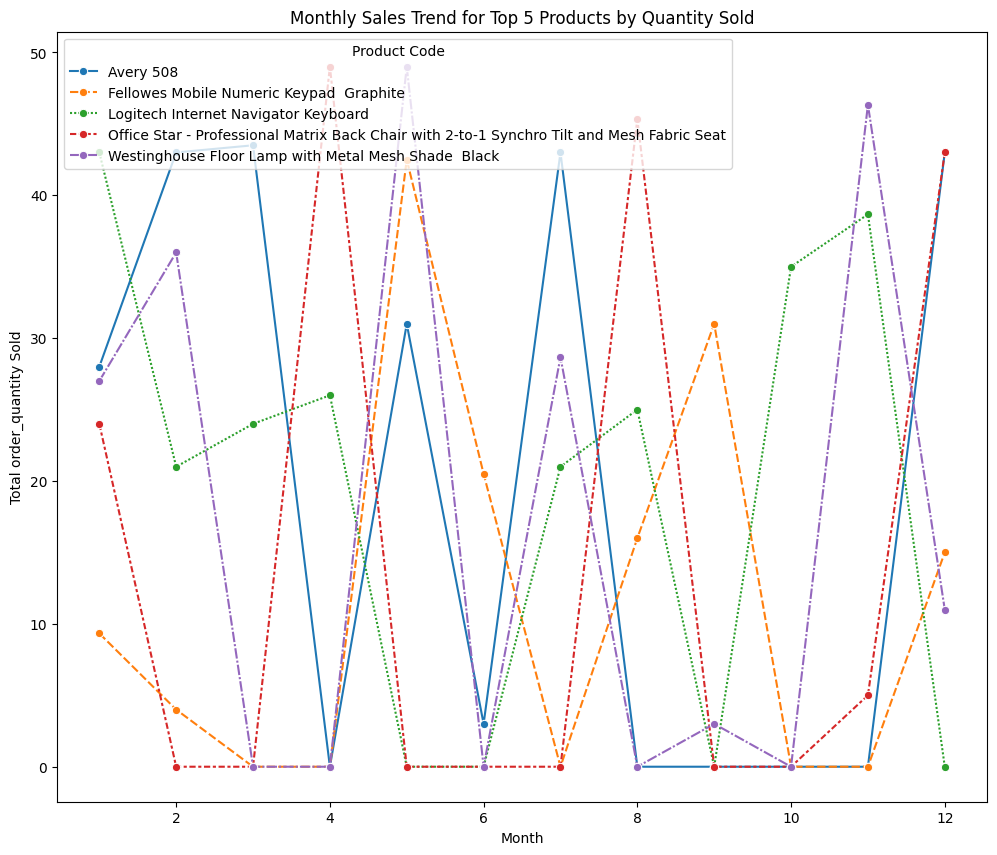

In [280]:
#checking for top five products by quantity sold
top_5_products = data1.groupby('product_name')['order_quantity'].sum().nlargest(5).index
top_5_products_data = data1[data1['product_name'].isin(top_5_products)]

# Extract the month from InvoiceDate
top_5_products_data['Month'] = top_5_products_data['order_date'].dt.month

# Obtain Monthly Sales
monthly_sales_top_5 = top_5_products_data.groupby(['product_name', 'Month'])['order_quantity'].mean().reset_index()

# Create a Pivot table for easy plotting
pivot_table = monthly_sales_top_5.pivot_table(index='Month', columns='product_name', values='order_quantity', fill_value=0)

# Plotting
plt.figure(figsize=(12, 10))
sns.lineplot(data=pivot_table, marker='o')
plt.title('Monthly Sales Trend for Top 5 Products by Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Total order_quantity Sold')
plt.legend(title='Product Code', loc='upper left')
plt.show()


Analyzing the Top 5 Products by Quantity Sold
Interpretation:

This line chart visualizes the monthly sales trend for the top 5 products based on their quantity sold. Each line represents a different product, and the y-axis indicates the total order quantity sold during each month.
 Fellowes Mobile Numeric keyboard Graphite spike the higest top order quantity product, followed by Westinghouse house floor  lamb with metal mesh and Office Star, this may as a result of seasonal trends factors like weather, holiday or specific events.

Recommendations
Customers who frequently purchase these products can be grouped into professional and home user, and identified as loyal customers and potential upselling opportunities and marketing strategies like promotions or inventory management are targeted to them.
 Discount and other marketing strategies can be offered to them to increase sales for customers with low frequent  purchase as well as other marketing promotions
 this product sales trends could be used toforecast future demand for these products and can help optimize inventory levels and avoid stockouts or excess inventory.
 this could enable Walmart Identify reliable suppliers for popular products to ensure a consistent supply and minimize disruptions.
  Walmart could can use this product trend to analyze customer reviews  of these products to identify areas for improvement and potential product enhancements.
They can also evaluate the lifecycle stage of each product to determine appropriate marketing and sales strategies.




### Heatmap  displaying the correlation between numeric columns.



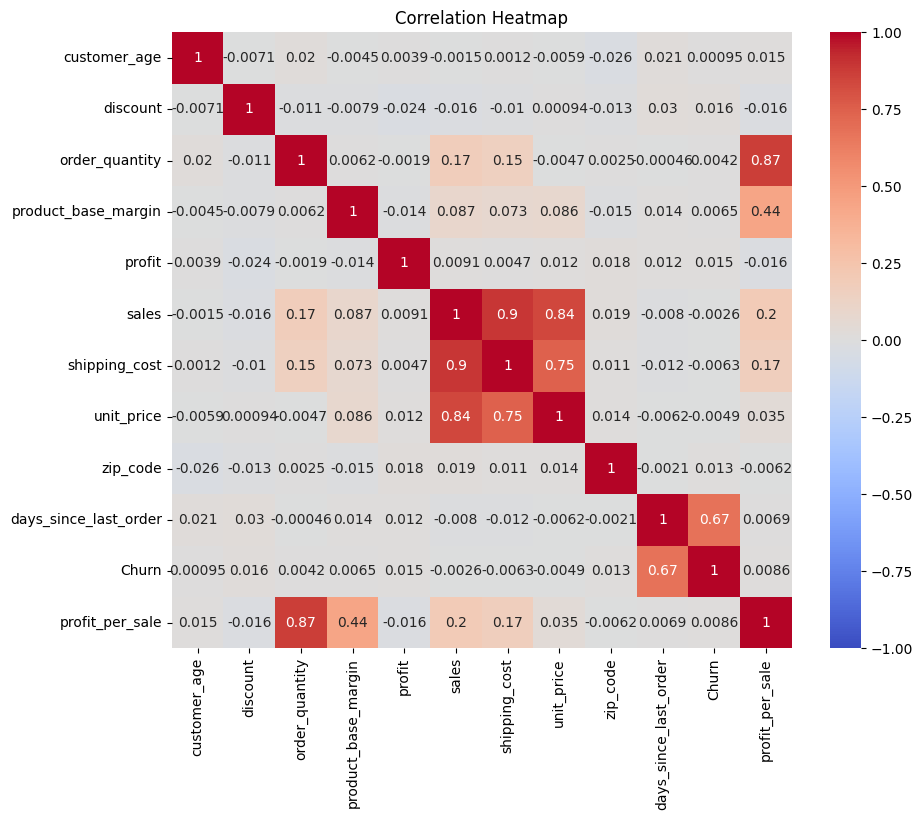

In [281]:
#heatmap to display the correlation between numeric columns.

correlation_matrix = data1.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Correlation matrix identify relationships between variables, here from the correlation plot  the different features had strong and weak correlation 

For Positive Correlation
Sales and Profit has strong positive correlation. As sales increase, profits generally increase as well.
Order Quantity and Sales has higher order quantity which naturally leads to higher sales, hence the positive correlation.
Shipping Cost and Sales: here the positive correlation suggests that higher shipping costs might be associated with larger orders or more expensive products.
Unit Price and Sales positive correlation indicates that higher-priced items which might be more profitable or in higher demand.
Days Since Last Order and Churn, a positive correlation between days_since_last_order and churn, which suggests that the longer a customer hasn't made a purchase, the more likely they are to churn. 

For Negative Correlations:
Discount and Profit: A negative correlation between discount and profit. where there is higher discounts generally reduce profit margins.
Churn and Profit per Sale: the weak correlation between these two features suggests that customers who churn tend to have lower profit per sale. This might be due to factors like product returns or lower-margin purchases.


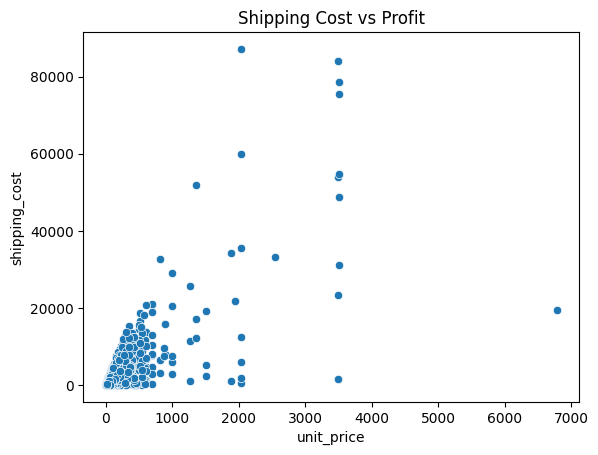

In [282]:
#Shipping Cost vs Profit
sns.scatterplot(x='unit_price', y='shipping_cost', data=data1)
plt.title('Shipping Cost vs Profit')
plt.show()

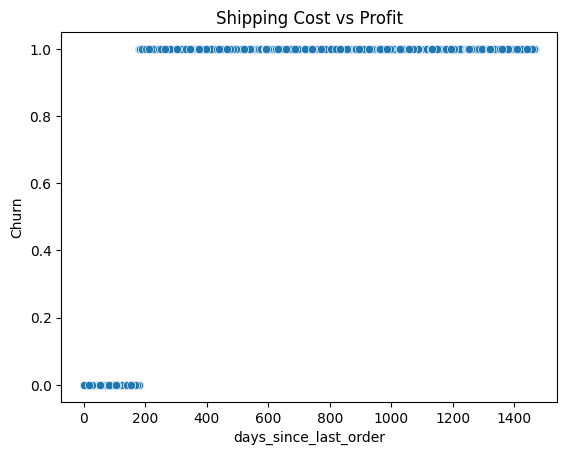

In [283]:
#Shipping Cost vs Profit
sns.scatterplot(x='days_since_last_order', y = 'Churn', data=data1)
plt.title('Shipping Cost vs Profit')
plt.show()

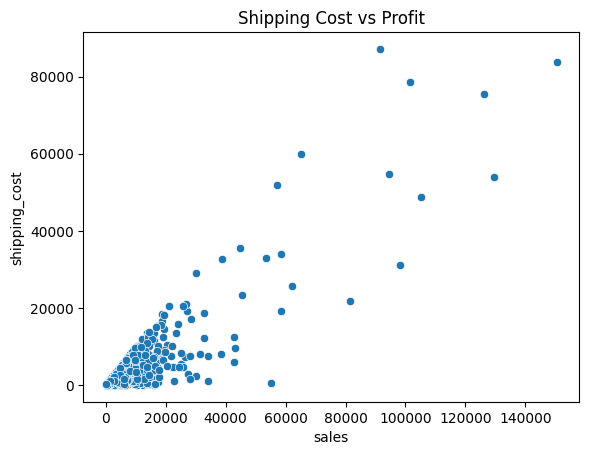

In [284]:
#Shipping Cost vs Profit
sns.scatterplot(x='sales', y='shipping_cost', data=data1)
plt.title('Shipping Cost vs Profit')
plt.show()

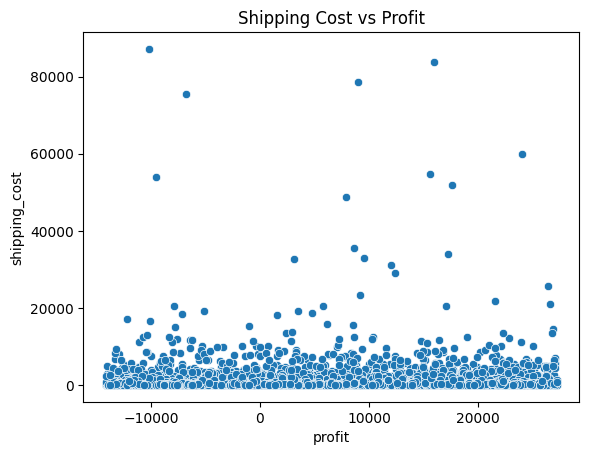

In [285]:
#Shipping Cost vs Profit
sns.scatterplot(x='profit', y='shipping_cost', data=data1)
plt.title('Shipping Cost vs Profit')
plt.show()


this plot shows the impact of shipping costs on overall profit.
A few orders with exceptionally high shipping costs are noticeable. These could represent special cases (e.g., large or expedited orders) and might require further investigation.this may also result as an outlier.
Recommendations
Orders with low shipping costs and high profits, Walmart may aim to replicate such scenarios by optimizing shipping methods or selecting cost-effective carriers.

orders with high shipping costs and negative profits might highlight inefficiencies. Investigating these outliers could uncover opportunities to streamline operations or avoid unprofitable shipping arrangements.

Identifying patterns in orders with high profits and manageable shipping costs can help design strategies to maximize profit margins

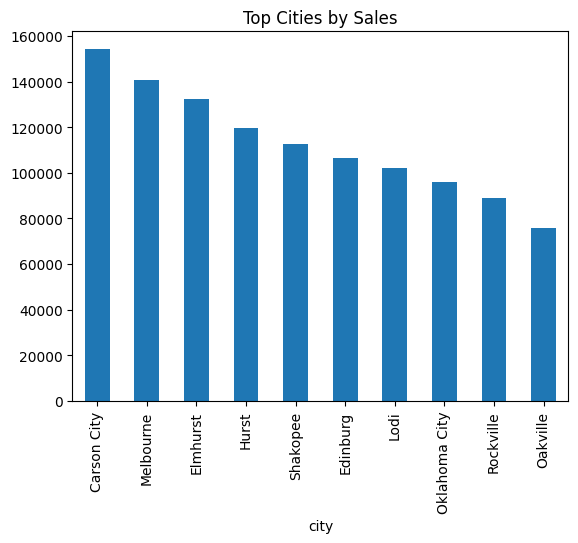

In [286]:
#Top cities by sales
city_sales = data1.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind='bar', title='Top Cities by Sales')
plt.show()

It identifies cities where Walmart performs best. top-performing cities in terms of sales, lead by Carson City and Melbourne. These cities represent regions with strong customer engagement or higher purchasing power, making them priority areas for marketing efforts and resource allocation and also certain product categories might be more popular in specific cities, informing inventory and marketing strategies.
this will enable Wlmart to look at Customer segments for  top cities to tailor offers and loyalty programs.
this plot also analyze product preferences in the top cities to understand regional demand variations.  

Recommendations:
Resources such as advertising budget and inventory, loyalty programs, discounts can be allocated  to cities with the highest ROI potential.
For cities with low sales, analyzing product preferences in these cities  to understand their demands and variations could inform good inventory management and marketing strategies like promotion or discount can be targeted to those cities to improve sales and the overall profit.


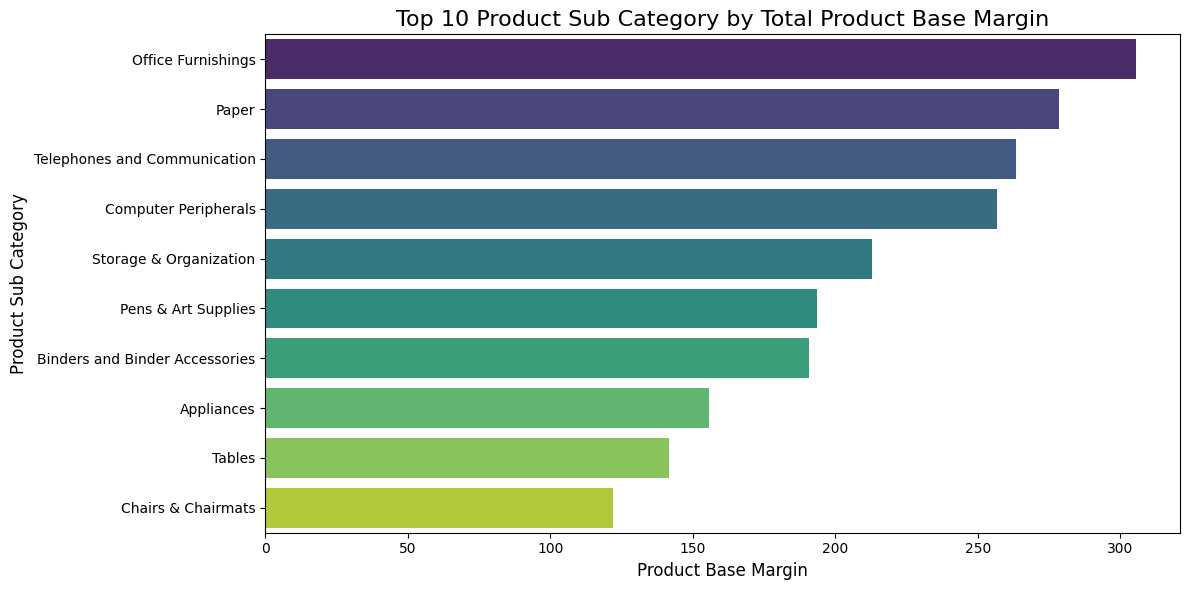

In [287]:
#Product sub category with product base margin
product_profit = data1.groupby('product_sub_category')['product_base_margin'].sum().sort_values(ascending=False)

# Get top 10 products by profit
top_10_products = product_profit.head(10)

# Plot the top 10 profitable products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
plt.title('Top 10 Product Sub Category by Total Product Base Margin', fontsize=16)
plt.xlabel('Product Base Margin', fontsize=12)
plt.ylabel('Product Sub Category', fontsize=12)
plt.tight_layout()
plt.show()


Identify which product subcategories contribute most to revenue through high-margin products.  this shows which product sub category favor premium products.
Recommendations
Customers with high-margin products might be grouped into a "High-Value Customers" segment.
high-cost product categories enable targeted marketing. You can focus promotions or loyalty programs specifically on the subcategories with significant revenue potential.

Identifying the subcategories with the most high-margin products can help you cluster customers based on their purchasing habits 

The underperforming subcategories marketing strategies, discount offers can be tailored for sales improvement (e.g., bundling or cross-selling).

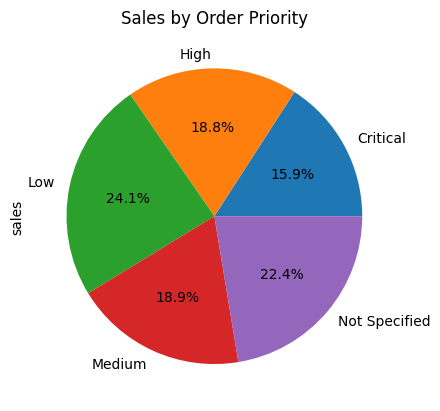

In [288]:
#Order Priority Analysis
priority_sales = data1.groupby('order_priority')['sales'].sum()
priority_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Order Priority')
plt.show()


The pie chat above shows how sales differ based on the priority of orders.

low order_priority (24.1%):

The highest proportion of sales is coming from Low Priority orders indicating that a significant number of customers are placing low-priority orders, possibly for non-urgent or less critical items.

Critical Priority Sales Are Low (15.9%):
Critical Priority orders is accounting for smallest portion of sales, which might be influenced by lack of awareness, high fees or cost associated with critical orders could also discourage customers from choosing this option.

Recommendation: 
Company can look into products that is  classified as critical. Increase riders for those products and marketing strategies.
Higher sales under low priority than the others. Walmalt can decide to reduce riders for low priority orders
Introducion of promotional offers, discount,incentives for critical order prioity, more awareness and educate customers about the benefit of critical priority like faster delivery time etc 
The company can also create customer purchase history to send personalized recommendations to frequent buyers, suggesting High or Critical Priority with tailored discounts.

High and Medium Priority (18.8% and 18.9%):
These two categories have a fairly balanced proportion of sales, showing moderate customer interest.Offers like  bundles or incentives for orders placed with Medium or High Priority. 
Recommendation:
Providing free shipping or quicker handling for these categories could encourage customers to upgrade from Low Priority to medium or high or even critical priority.

Not Specified (22.4%):
This could be due to customers skipping the priority selection or unclear instructions on the importance of choosing a priority.



Company can look into products that is  classified as critical. Increase riders for those products and marketing strategies

low order_priority (24.1%):

The highest proportion of sales is coming from Low Priority orders indicating that a significant number of customers are placing low-priority orders, possibly for non-urgent or less critical items.

Critical Priority Sales Are Low (15.9%):
Critical Priority orders is accounting for smallest portion of sales, which might be influenced by lack of awareness, high fees or cost associated with critical orders could also discourage customers from choosing this option.

Recommendation: Introducion of promotional offers, discount,incentives for critical order prioity, more awareness and educate customers about the benefit of critical priority like faster delivery time etc 
The company can also create customer purchase history to send personalized recommendations to frequent buyers, suggesting High or Critical Priority with tailored discounts.

High and Medium Priority (18.8% and 18.9%):
These two categories have a fairly balanced proportion of sales, showing moderate customer interest.Offers like  bundles or incentives for orders placed with Medium or High Priority. 

Providing free shipping or quicker handling for these categories could encourage customers to upgrade from Low Priority to medium or high or even critical priority.

Not Specified (22.4%):
This could be due to customers skipping the priority selection or unclear instructions on the importance of choosing a priority.



 

In [289]:
print(data1.columns)

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'days_since_last_order', 'Churn', 'profit_per_sale',
       'Year-Month', 'Year-Quarter'],
      dtype='object')


Insight: Understand how frequently customers order different quantities. the orders quantity were semi_uniform or fairly evenly distributed
  with no significant spike, however there is slight deep around the middle 20-30 and immediate increase around higher quantities(40-50)
This distribution suggest orders of all sizes are common but medium range (20-30) are slightly less frequent.



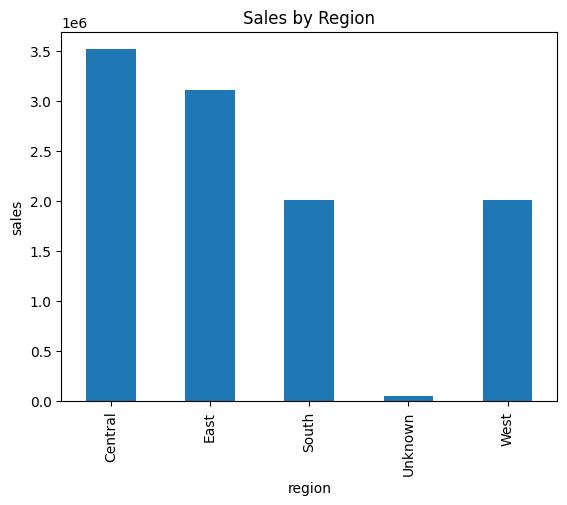

In [290]:
#total sales per region
region_sales = data1.groupby('region')['sales'].sum()
region_sales.plot(kind='bar', stacked=False, title='Sales by Region')
plt.xlabel('region')
plt.ylabel('sales')
plt.show()

In [291]:
data1[data1['customer_segment'] == 'Home Office'].T

,6559,3902,7126,1789,6605,1970,5478,3553,4614,3401,...,9284,4662,418,2801,3305,882,9929,9928,9779,9028
city,Independence,Framingham,Oak Ridge,Harker Heights,North Pembroke,Spring,Mauldin,Hanson,Rocky Mount,Hopkinsville,...,Fairfax,Clifton,Pearl,Pawtucket,Marietta,Caldwell,West Milford,West Milford,Little Rock,Brooklyn Park
customer_age,79.0,61.0,61.0,35.0,60.0,56.0,84.0,35.0,38.0,37.0,...,59.0,82.0,35.0,35.0,56.0,81.0,32.0,32.0,82.0,80.0
customer_name,Aaron Bergman,Aaron Hawkins,Aaron Smayling,Adam Bellavance,Adam Bellavance,Adam Hart,Adam Shillingsburg,Adam Shillingsburg,Adrian Barton,Adrian Hane,...,Vivek Sundaresam,Vivek Sundaresam,Vivek Sundaresam,Vivian Mathis,William Brown,Xylona Price,Yana Sorensen,Yana Sorensen,Yoseph Carroll,Yoseph Carroll
customer_segment,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,...,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office,Home Office
discount,0.1,0.09,0.1,0.22,0.14,0.11,0.1,0.23,0.08,0.16,...,0.1,0.12,0.18,0.19,0.06,0.23,0.09,0.09,0.15,0.02
order_date,2020-12-03 00:00:00,2022-11-20 00:00:00,2019-05-28 00:00:00,2020-01-24 00:00:00,2022-04-06 00:00:00,2021-11-08 00:00:00,2019-06-30 00:00:00,2021-01-12 00:00:00,2022-03-30 00:00:00,2019-11-09 00:00:00,...,2020-01-02 00:00:00,2021-02-05 00:00:00,2021-05-03 00:00:00,2022-03-27 00:00:00,2022-08-30 00:00:00,2021-01-27 00:00:00,2020-09-02 00:00:00,2020-09-02 00:00:00,2019-05-28 00:00:00,2019-11-01 00:00:00
order_id,3396abd0-0c50-4194-a56c-d44ad240d19c,d0cfccee-639c-43ae-8e0f-ad3feb150fd2,05d61572-4ea3-41df-b97f-beec4dc59141,a0ccf342-7761-448c-8233-73bd67df8975,a1a06458-a3cf-4c9a-9878-43d23a5f0ee6,4310abb9-f2a8-4667-8df7-71a312d3c488,b615a990-3281-409b-aba9-80211a77c943,1a1a476a-1c08-4058-bbd1-0bedacbdbb3b,26d5c574-bb73-4d14-aa9a-b94712117af8,933180db-ae90-4df7-8110-ae60bae2c6cc,...,d58bcf8b-c740-4076-8254-285baf1542e8,413a95d7-e8f6-48fc-a825-f44ee4f5a69c,fa2985a3-6186-48f8-84d0-c94f685aaf7d,e57b78fe-defd-4fc9-96d2-00cdc1d26224,2bc24728-744c-4d89-b16a-b0308512e283,c19b0724-4195-4f0b-b6b5-24cc102386df,dcc4501e-ee3c-416d-8e10-d312fd043069,3d991c22-d6b4-43a1-b50e-895316f89697,0e4f8b35-3575-4d5e-b390-3fcbf38b9741,870b38a6-89c2-4a8d-95bf-e9b99104a4b4
order_priority,Not Specified,Critical,Not Specified,Critical,Low,Not Specified,Low,Critical,High,High,...,Medium,High,Critical,Critical,Critical,Critical,Medium,Medium,Critical,Critical
order_quantity,40.0,45.0,20.0,31.0,30.0,4.0,40.0,5.0,45.0,2.0,...,12.0,15.0,49.0,7.0,14.0,17.0,32.0,32.0,1.0,10.0
product_base_margin,0.36,0.65,0.38,0.49,0.55,0.42,0.85,0.62,0.49,0.38,...,0.36,0.36,0.39,0.76,0.38,0.74,0.8,0.66,0.59,0.46


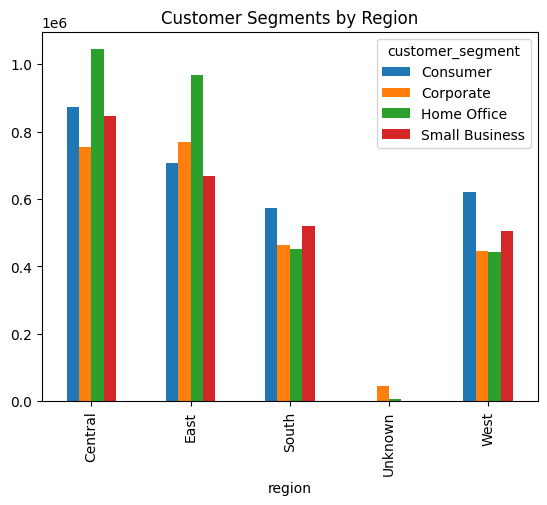

In [292]:
#Customer Segments in Regions
region_segment = data1.groupby(['region', 'customer_segment'])['sales'].sum().unstack()
region_segment.plot(kind='bar', stacked=False, title='Customer Segments by Region')
plt.show()


This plot analyzed which customer segments dominates specific regions. Home office showed the highest segment for central and east region while indicating least segment for West and South.

Customer Segments:

Consumer (Blue): Consistently has high sales in most regions, dominating in the West.
Corporate (Orange): Maintains moderate sales across all regions, with smaller contributions compared to other segments.
Home Office (Green): Leads significantly in the Central and East regions.
Small Business (Red): Performs well in the Central, East, and South regions but trails in others.

Regions:

Central Region: The highest revenue comes from the Home Office segment, followed closely by Small Business and Consumer.
East Region: Similar to the Central region, the Home Office segment leads, but Consumer sales are also strong.
South Region: Dominated by Consumer and Small Business segments, with relatively smaller contributions from other segments.
West Region: Strong dominance by the Consumer segment, significantly outpacing other customer types.
Unknown Region: Very low sales overall, with negligible contributions from all segments.

Recommendations
The Home Office segment drives the most revenue in the Central and East regions, making them a priority for campaigns in those areas. and for the rest of the regions with low revenue, strategic marketing strategies and promotional offers should be directed to these regions. we also examine the price sensitivity of these region and offer discounts to most of the products to increase sales.
The Consumer segment is the leader in the West and performs well in the South, showing strong potential for personalized marketing strategies in these regions.


### DATA PREPROCESSING

In [293]:
#the average unit price per product
average_unit_price_per_product = data1.groupby(['order_id','product_name'])['unit_price'].mean().sort_values(ascending=False).reset_index()
average_unit_price_per_product

,order_id,product_name,unit_price
0,dea969d5-b7c8-4184-bc54-2bd94b3c8a52,Polycom ViewStation ISDN Videoconferencing Unit,6783.02
1,41292c41-2814-4826-bec7-c4e3d8b9d5f1,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
2,0523a31d-5d3d-48fd-9b6a-a22ee4311a1e,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
3,fa4c0d03-0882-4115-8a28-b2b0d34a69ad,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
4,2ec3ba10-83d5-46b5-b193-9c62265fc99e,Okidata Pacemark 4410N Wide Format Dot Matrix ...,3502.14
...,...,...,...
4900,d2491cc7-8d09-4aff-babc-26f912239852,Bagged Rubber Bands,1.26
4901,10ecf0ea-8806-4165-b05a-760b5f9fcd9d,Bagged Rubber Bands,1.26
4902,0d47687e-cb58-42b7-bb3c-1876840adc18,OIC Thumb-Tacks,1.14
4903,457b97c1-b545-423c-bef0-03ffb2753c16,Sony IBM Color Diskettes 25/Pack,0.99


In [294]:
#total quantity sold per customer.


total_quantity_sold_per_customer = data1.groupby('customer_name')['order_quantity'].sum().reset_index()
total_quantity_sold_per_customer

,customer_name,order_quantity
0,Aaron Bergman,230.0
1,Aaron Hawkins,145.0
2,Aaron Smayling,184.0
3,Adam Bellavance,211.0
4,Adam Hart,145.0
...,...,...
778,Vivian Mathis,133.0
779,William Brown,158.0
780,Xylona Price,91.0
781,Yana Sorensen,153.0


#### Segmentation

In [295]:
data1['ReturnFlag'] = (data1['order_quantity'] < 0).astype(int)
data1.head(5)

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,shipping_cost,state,unit_price,zip_code,days_since_last_order,Churn,profit_per_sale,Year-Month,Year-Quarter,ReturnFlag
9949,Lakeville,25.0,Aaron Bergman,Consumer,0.22,2019-04-12,3ee14cf5-b8aa-4781-90d6-5bc4ff6f56a8,Critical,17.0,0.72,...,30.066208,Minnesota,4.77,55044.0,1366.0,1,12.24,2019-04,2019Q2,0
259,Tupelo,72.0,Aaron Bergman,Consumer,0.22,2019-05-03,0d9c800e-9fab-4dbf-a1dd-8831a1d7ed0b,Critical,30.0,0.69,...,3911.566600,Mississippi,130.98,38801.0,21.0,0,20.70,2019-05,2019Q2,0
4465,Texarkana,43.0,Aaron Bergman,Small Business,0.01,2019-09-20,b78523cb-4691-485c-8ca3-fa5d9f04bf8b,Critical,17.0,0.57,...,213.407989,Texas,40.97,75503.0,140.0,0,9.69,2019-09,2019Q3,0
302,Port Chester,78.0,Aaron Bergman,Corporate,0.14,2020-04-17,210af5ed-7809-4156-94ad-cb0dfa0f86c5,Medium,25.0,0.80,...,114.552893,New York,70.98,10573.0,210.0,1,20.00,2020-04,2020Q2,0
2421,Perry Hall,77.0,Aaron Bergman,Corporate,0.20,2020-05-12,426fe37e-d8cd-427d-9dbb-8462432723fb,Not Specified,20.0,0.36,...,98.427248,Maryland,5.38,21128.0,25.0,0,7.20,2020-05,2020Q2,0


In [296]:
recency_df = data1.groupby('customer_name')['order_date'].max().reset_index()
recency_df['recency'] = (data1['order_date'].max() - recency_df['order_date']).dt.days
recency_df

,customer_name,order_date,recency
0,Aaron Bergman,2022-10-21,78
1,Aaron Hawkins,2022-11-20,48
2,Aaron Smayling,2022-06-08,213
3,Adam Bellavance,2022-11-14,54
4,Adam Hart,2022-02-07,334
...,...,...,...
778,Vivian Mathis,2022-08-27,133
779,William Brown,2022-08-30,130
780,Xylona Price,2021-10-18,446
781,Yana Sorensen,2020-09-02,857


In [297]:
recency_df = data1.groupby('customer_name')['order_date'].max().reset_index()
recency_df['Recency'] = (data1['order_date'].max() - recency_df['order_date']).dt.days
recency_df = recency_df.drop(columns='order_date', axis=1)

# Frequency: Number of orders per customer
frequency_df = data1.groupby('customer_name')['order_id'].count().reset_index()
frequency_df.columns = ['customer_name', 'Frequency']

# Monetary: Total sales per customer
monetary_df = data1.groupby('customer_name')['sales'].sum().reset_index()
monetary_df.columns = ['customer_name', 'Monetary']

# Merge Recency, Frequency, and Monetary
rfm_df = recency_df.merge(frequency_df, on='customer_name').merge(monetary_df, on='customer_name')


In [298]:
rfm_df

,customer_name,Recency,Frequency,Monetary
0,Aaron Bergman,78,10,29397.67
1,Aaron Hawkins,48,6,9038.15
2,Aaron Smayling,213,7,20116.40
3,Adam Bellavance,54,8,7446.73
4,Adam Hart,334,8,4534.05
...,...,...,...,...
778,Vivian Mathis,133,6,4199.81
779,William Brown,130,7,101398.45
780,Xylona Price,446,5,4689.29
781,Yana Sorensen,857,6,36656.04


In [299]:
# # Step 3: Assign RFM Scores based on quartiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])  # Lower recency is better
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])  # Higher frequency is better
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])  # Higher monetary is better

# # RFM Score (Sum of RFM)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print(rfm_df)

       customer_name  Recency  Frequency   Monetary R_Score F_Score M_Score  \
0      Aaron Bergman       78         10   29397.67       3       4       4   
1      Aaron Hawkins       48          6    9038.15       4       2       3   
2     Aaron Smayling      213          7   20116.40       2       3       4   
3    Adam Bellavance       54          8    7446.73       4       3       2   
4          Adam Hart      334          8    4534.05       1       3       2   
..               ...      ...        ...        ...     ...     ...     ...   
778    Vivian Mathis      133          6    4199.81       3       2       1   
779    William Brown      130          7  101398.45       3       3       4   
780     Xylona Price      446          5    4689.29       1       1       2   
781    Yana Sorensen      857          6   36656.04       1       2       4   
782   Yoseph Carroll      553          5   13715.12       1       1       3   

     RFM_Score  
0           11  
1            9  


RFM (Recency, Frequency, Monetary) analysis, which is a method used in marketing to segment customers based on their purchasing behavior.
 The RFM_Score gives an overall measure of customer value based on recency, frequency, and monetary metrics:

Higher RFM Scores: Indicate high-value customers who purchase frequently, spend a lot, and have bought recently.
Lower RFM Scores: Indicate less engaged or low-value customers.


In [300]:
rfm_df['RFM_Score'].max()

12

### Customer Segmentation (K-Means Clustering)

In [301]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = rfm_df.drop(columns='customer_name', axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Use the Elbow Method to find the optimal number of clusters
inertia = []  # Inertia measures the sum of squared distances of samples to their closest cluster center
K = range(1, 11)  # Try cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

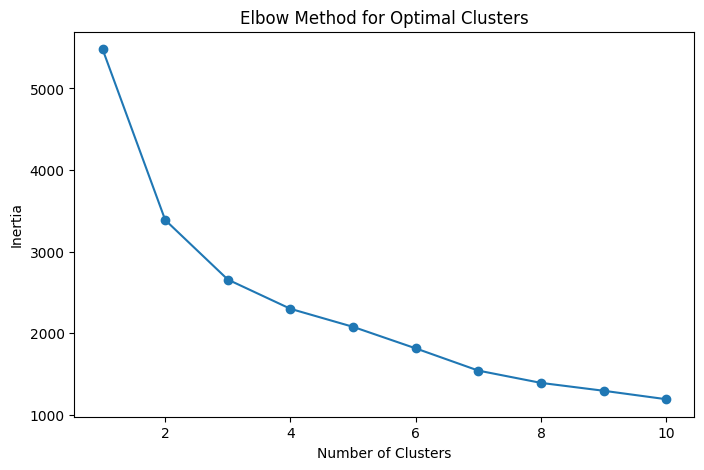

In [302]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

This elbow method in k-means clustering  which is used to determine the optimal number of clusters in a dataset. 
here the best cluster point is 2
Pointing out the two cluster points of high value customers and low value customer helped in identifying distinct customer segments, which the company can tailor marketing campaigns 
and promotions to their specific needs and preferences. This can lead to higher conversion rates and increased customer satisfaction.

For Sales Performance Strategy: it will help the compaany optimize their sales strategy by focusing on high-value segments and allocating resources accordingly.
and as well understanding the buying behavior of different segments, sales forcast and iinventory management can also be produced.

In [303]:
rfm_df['RFM_Score'].reset_index()

,index,RFM_Score
0,0,11
1,1,9
2,2,9
3,3,9
4,4,6
...,...,...
778,778,6
779,779,10
780,780,4
781,781,7


In [304]:
# features = rfm_df[['R_Score', 'F_Score', 'M_Score']]
features = rfm_df.drop(columns='customer_name')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
model = KMeans(n_clusters=2, random_state=42)

rfm_df['Segment'] = model.fit_predict(scaled_features)
rfm_df


,customer_name,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,Aaron Bergman,78,10,29397.67,3,4,4,11,0
1,Aaron Hawkins,48,6,9038.15,4,2,3,9,0
2,Aaron Smayling,213,7,20116.40,2,3,4,9,0
3,Adam Bellavance,54,8,7446.73,4,3,2,9,0
4,Adam Hart,334,8,4534.05,1,3,2,6,1
...,...,...,...,...,...,...,...,...,...
778,Vivian Mathis,133,6,4199.81,3,2,1,6,1
779,William Brown,130,7,101398.45,3,3,4,10,0
780,Xylona Price,446,5,4689.29,1,1,2,4,1
781,Yana Sorensen,857,6,36656.04,1,2,4,7,1


In [305]:
# Step 3: Calculate the mean RFM_Score for each cluster
cluster_means = rfm_df.groupby('Segment')['RFM_Score'].mean().sort_values()

# Step 4: Create a mapping for cluster labels based on the sorted order
ordered_mapping = {cluster: rank for rank, cluster in enumerate(cluster_means.index)}

# Step 5: Apply the mapping to the Cluster column
rfm_df['Segment'] = rfm_df['Segment'].map(ordered_mapping)
rfm_df


,customer_name,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,Aaron Bergman,78,10,29397.67,3,4,4,11,1
1,Aaron Hawkins,48,6,9038.15,4,2,3,9,1
2,Aaron Smayling,213,7,20116.40,2,3,4,9,1
3,Adam Bellavance,54,8,7446.73,4,3,2,9,1
4,Adam Hart,334,8,4534.05,1,3,2,6,0
...,...,...,...,...,...,...,...,...,...
778,Vivian Mathis,133,6,4199.81,3,2,1,6,0
779,William Brown,130,7,101398.45,3,3,4,10,1
780,Xylona Price,446,5,4689.29,1,1,2,4,0
781,Yana Sorensen,857,6,36656.04,1,2,4,7,0


In [306]:
# Step 6: Verify the results
print(rfm_df['Segment'].value_counts())
print(rfm_df.groupby('Segment')['RFM_Score'].mean())

Segment
0    420
1    363
Name: count, dtype: int64
Segment
0    5.297619
1    9.391185
Name: RFM_Score, dtype: float64


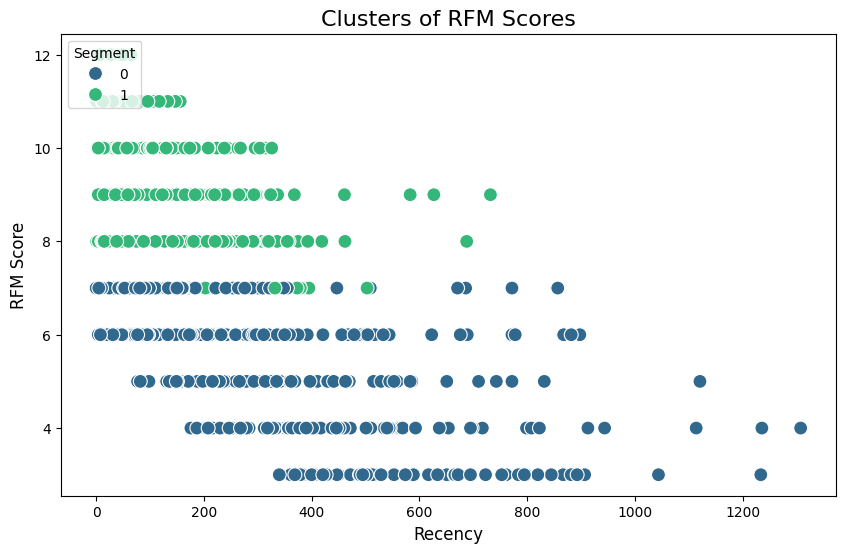

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency', y='RFM_Score', hue='Segment', palette='viridis', data=rfm_df, s=100
)
plt.title('Clusters of RFM Scores', fontsize=16)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('RFM Score', fontsize=12)
plt.legend(title='Segment', loc='upper left', fontsize=10)
plt.show()


 These are two clusters are differentiated based on their overall RFM scores.
Cluster 0: This cluster likely consists of low-value customers with lower recency, frequency, and monetary value. They might be occasional buyers or one-time customers.
Cluster 1: This cluster likely represents high valuable customers with high recency purchase, high frequency, and high monetary value. They are Walmart most loyal and profitable customers

Recommendations:

Cluster 0 group customer marketing strategy Walmart should focus on Implementing reactivation strategies to re-engage these customers, such as targeted email campaigns, special promotions, or product recommendations. 
Cluster 1: Walmaet should focus on retention strategies for these high-value customers, such as personalized offers, exclusive discounts, and loyalty programs.

The company should also analyze the purchasing behavior of each cluster to optimize inventory levels for different product categories.

Text(0.5, 1.0, 'Customer Segmentation using Clustering')

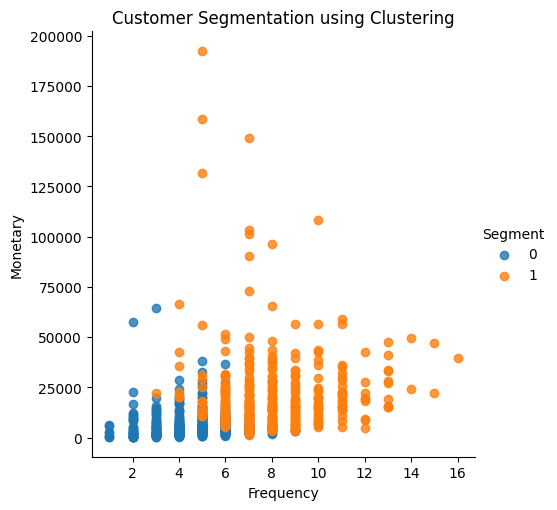

In [308]:
# Plotting Clusters
facet = sns.lmplot(data=rfm_df, x='Frequency', y='Monetary', hue='Segment',
                   fit_reg=False, legend=True, legend_out=True)
plt.title("Customer Segmentation using Clustering")

Segment 0 (Blue): This segment consists of customers who make frequent purchases but spend relatively less per transaction. These customers might be budget-conscious or prefer to buy smaller quantities more often.
Segment 1 (Orange): This segment represents high-value customers who make fewer purchases but spend significantly more per transaction. They are likely premium customers or those who make bulk purchases.
Insights and Recommendations:

Targeted Marketing:
Segment 0: Implement loyalty programs, personalized offers, and cross-selling strategies to encourage increased spending and higher average order values.
Segment 1: Prioritize retention efforts for these high-value customers. Offer exclusive deals, personalized recommendations, and exceptional customer service to maintain their loyalty.
Inventory Management:

Analyze the purchasing behavior of each segment to optimize inventory levels for different product categories. For example, you might need to stock more high-value items for Segment 1.

In [309]:
data1 = data1.merge(rfm_df[['customer_name', 'Segment']], on='customer_name', how='left')
data1.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,state,unit_price,zip_code,days_since_last_order,Churn,profit_per_sale,Year-Month,Year-Quarter,ReturnFlag,Segment
0,Lakeville,25.0,Aaron Bergman,Consumer,0.22,2019-04-12,3ee14cf5-b8aa-4781-90d6-5bc4ff6f56a8,Critical,17.0,0.72,...,Minnesota,4.77,55044.0,1366.0,1,12.24,2019-04,2019Q2,0,1
1,Tupelo,72.0,Aaron Bergman,Consumer,0.22,2019-05-03,0d9c800e-9fab-4dbf-a1dd-8831a1d7ed0b,Critical,30.0,0.69,...,Mississippi,130.98,38801.0,21.0,0,20.70,2019-05,2019Q2,0,1
2,Texarkana,43.0,Aaron Bergman,Small Business,0.01,2019-09-20,b78523cb-4691-485c-8ca3-fa5d9f04bf8b,Critical,17.0,0.57,...,Texas,40.97,75503.0,140.0,0,9.69,2019-09,2019Q3,0,1
3,Port Chester,78.0,Aaron Bergman,Corporate,0.14,2020-04-17,210af5ed-7809-4156-94ad-cb0dfa0f86c5,Medium,25.0,0.80,...,New York,70.98,10573.0,210.0,1,20.00,2020-04,2020Q2,0,1
4,Perry Hall,77.0,Aaron Bergman,Corporate,0.20,2020-05-12,426fe37e-d8cd-427d-9dbb-8462432723fb,Not Specified,20.0,0.36,...,Maryland,5.38,21128.0,25.0,0,7.20,2020-05,2020Q2,0,1


In [310]:
data1.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'days_since_last_order', 'Churn', 'profit_per_sale',
       'Year-Month', 'Year-Quarter', 'ReturnFlag', 'Segment'],
      dtype='object')

### Association Rule/ Market Basket

In [311]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group the data by 'InvoiceNo' and 'Description' and sum up the 'Quantity' values
basket = data1.groupby(['order_id', 'product_name'])['order_quantity'].sum().unstack().fillna(0).reset_index().set_index('order_id')

# Define an encoding function to convert quantities into binary (1 if purchased, 0 if not)
def encode(x):
    return x >= 1  # This will return True (1) for quantities >= 1, and False (0) otherwise

# Apply the encoding function to the basket and convert it to a boolean DataFrame for performance
basket_encoded = basket.apply(encode)
basket_encoded = basket_encoded.astype(bool)

# Use the Apriori Algorithm to display frequent itemsets with over 1% support
freq_sets = apriori(basket_encoded, min_support=0.0001, use_colnames=True)

# Check frequent itemsets
print("Frequent Itemsets:")
print(freq_sets)

Frequent Itemsets:
       support                                           itemsets
0     0.000612                   (*Staples* Highlighting Markers)
1     0.000612                       (*Staples* Packaging Labels)
2     0.001019  (1.7 Cubic Foot Compact Cube Office Refrigerat...
3     0.001223                         (12 Colored Short Pencils)
4     0.001223                 (12-1/2 Diameter Round Wall Clock)
...        ...                                                ...
1199  0.000612                                         (i500plus)
1200  0.001223                                             (i600)
1201  0.000815                                        (iDEN i550)
1202  0.000204                                         (iDEN i95)
1203  0.000204                                         (iDENi80s)

[1204 rows x 2 columns]


In [312]:
freq_sets

,support,itemsets
0,0.000612,(*Staples* Highlighting Markers)
1,0.000612,(*Staples* Packaging Labels)
2,0.001019,(1.7 Cubic Foot Compact Cube Office Refrigerat...
3,0.001223,(12 Colored Short Pencils)
4,0.001223,(12-1/2 Diameter Round Wall Clock)
...,...,...
1199,0.000612,(i500plus)
1200,0.001223,(i600)
1201,0.000815,(iDEN i550)
1202,0.000204,(iDEN i95)


In [313]:
print("Max support in freq_sets:", freq_sets['support'].max())

Max support in freq_sets: 0.0030581039755351682


In [314]:
# Generate association rules with a lower confidence threshold
ass_rules = association_rules(freq_sets, num_itemsets=len(freq_sets), metric="confidence", min_threshold=0.00)  # Lowered to 0.3
ass_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


### Predicting Customer Churn Using Decision Trees


- create base model, to pick features 
    - show model score
    - show a plot of the feature importance
- create a loop that uses different algorithms (RF, XGBoost, DT, etc) trying to find the  best values for your hyperparameters
- chose one model based on the highest accuracy score


Extracting these date components enables more granular analysis and modeling.
For instance, analyzing sales trends by year, month, or day of the week.
Temporal Analysis:

Helps identify patterns in orders and shipments, such as peak months or days with higher volumes.
Machine Learning:

Models can use these features as predictors (e.g., to forecast demand, identify delays).


In [315]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the Data

# Extract features from the datetime columns
data1['order_year'] = data1['order_date'].dt.year
data1['order_month'] = data1['order_date'].dt.month
data1['order_day'] = data1['order_date'].dt.day
data1['order_weekday'] = data1['order_date'].dt.weekday

data1['ship_year'] = data1['ship_date'].dt.year
data1['ship_month'] = data1['ship_date'].dt.month
data1['ship_day'] = data1['ship_date'].dt.day
data1['ship_weekday'] = data1['ship_date'].dt.weekday


X = data1.drop(columns=['Churn', 'order_date', 'ship_date', 'Year-Month', 'order_id', 'Year-Quarter']) 
y = data1['Churn']  # Target column

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Train a Base Model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Score (Accuracy)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n")
print(report)


Model Accuracy: 1.0000
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       1.00      1.00      1.00       702

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



The model achieved a perfect accuracy of 1.0000, indicating that it correctly classified all instances influence by Day_since_last_order column
Day_since_last_order is the most important feature suggests that customer inactivity is a strong predictor of churn. This aligns with intuition, as customers who haven't made purchases in a long time are more likely to churn.
other features like "profit," "shipping cost," and "customer age" likely contribute to the model's overall performance.

Recommendation:
Company can segment customers based on their churn risk and tailor retention strategies accordingly.
Also can offer personalized incentives, discounts, or loyalty programs to retain high-value customers.
Customer Feedback can also be gotten to understand reasons for churning and identify areas for improvement.

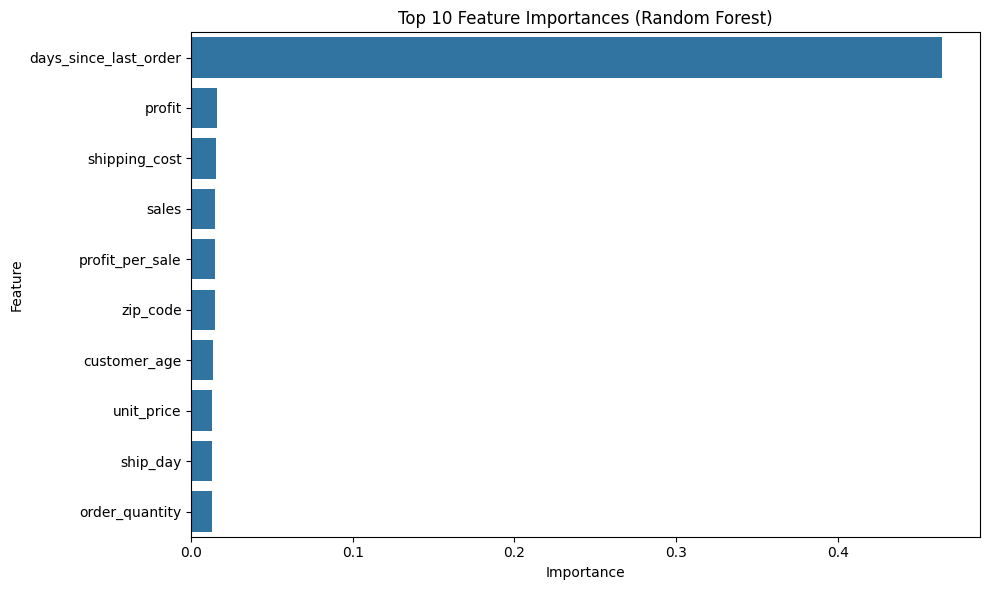

In [316]:
# Plotting Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))  # Top 10 features
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Days Since Last Order is the most important feature, indicating that recent customer activity is a strong predictor of churn. 
Customers who haven't made a purchase in a long time are more likely to churn.
Shipping Cost, Sales, and Profit per Sale: These features might be correlated with customer satisfaction or the overall shopping experience. 
Higher shipping costs or lower profit margins could indicate potential issues that might lead to churn.

Recommendations:
Prioritize customers with longer inactivity periods. 
Implement targeted re-engagement strategies such as personalized offers, discount,email campaigns, or loyalty programs

Walmart should Segment customers based on their profit margin and recent purchase behavior. 
This can help identify high-value customers who require special attention.
For high shipping cost, the company should analyze the impact of shipping costs on customer satisfaction and churn and consider offering 
free shipping or discounted shipping for high-value customers or during specific promotions.
The company should also carefully monitor product profitability and adjust pricing strategies to optimize margins and customer satisfaction, especially
for price sensitive customers.

for the overall customer retention, Walmart should also have focus on improving the overall customer experience, including website usability, customer support, and order fulfillment.


### Predicting Sales Using Random Forest

In [317]:
# Drop unnecessary columns
data1 = data1.drop(columns=['customer_name', 'order_date', 'ship_date', 'order_id', 'zip_code', 'profit', 'customer_age', 'product_sub_category'])

# Separate features and target variable
X = data1.drop(columns='sales')
y = data1['sales']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
print(numeric_features)
print(categorical_features)

Index(['discount', 'order_quantity', 'product_base_margin', 'shipping_cost',
       'unit_price', 'days_since_last_order', 'profit_per_sale', 'Segment'],
      dtype='object')
Index(['city', 'customer_segment', 'order_priority', 'product_category',
       'product_container', 'product_name', 'region', 'ship_mode', 'state'],
      dtype='object')


In [318]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV


# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, use_label_encoder=False),
        'params': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__max_depth': [3, 6, 10]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    }
}



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_models = {}

for name, entry in models.items():
    print(f"Training model: {name}")
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', entry['model'])
    ])
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        model,
        entry['params'],
        cv=3,  # 3-fold cross-validation
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_models[name] = (best_model, best_params)
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Best Parameters for {name}: {best_params}")
    print(f"{name} - Mean Squared Error: {mse:.4f}")
    print(f"{name} - R^2 Score: {r2:.4f}\n")


Training model: Random Forest
Best Parameters for Random Forest: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Random Forest - Mean Squared Error: 4709075.6124
Random Forest - R^2 Score: 0.8017

Training model: XGBoost
Best Parameters for XGBoost: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
XGBoost - Mean Squared Error: 869792.9593
XGBoost - R^2 Score: 0.9634

Training model: Linear Regression
Best Parameters for Linear Regression: {}
Linear Regression - Mean Squared Error: 17394971.5213
Linear Regression - R^2 Score: 0.2675



XGBoost emerges as the recommended model for predicting sales performance. 
Its ability to handle complex relationships and its robust predictive power make it a suitable choice for this task.
It exhibits significantly higher R-squared score compared to Linear Regression and Random Forest.

In [319]:
best_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        random_state=42,
        learning_rate=0.2,
        max_depth=3,
        n_estimators=200
    ))
])

# Train the model
best_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['discount', 'order_quantity', 'product_base_margin', 'shipping_cost',
       'unit_price', 'days_since_last_order', 'profit_per_sale', 'Segment'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['city', 'customer_segment', 'order_priority', 'product_c...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [320]:
best_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['discount', 'order_quantity', 'product_base_margin', 'shipping_cost',
       'unit_price', 'days_since_last_order', 'profit_per_sale', 'Segment'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['city', 'customer_segment', 'order_priority', 'product_c...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [321]:
live_sample = pd.DataFrame([{
    'discount': 0.10,
    'order_quantity': 15,
    'product_base_margin': 0.45,
    'shipping_cost': 20.5,
    'unit_price': 99.99,
    'profit_per_sale':0.17,
    'days_since_last_order': 30,
    'Segment': 1,  # Assuming Segment is numeric
    'city': 'New York',
    'customer_segment': 'Corporate',
    'order_priority': 'High',
    'product_category': 'Office Supplies',
    'product_container': 'Small Box',
    'product_name': 'Xerox Paper',
    'region': 'East',
    'ship_mode': 'Regular Air',
    'state': 'New York'
}])

live_prediction = best_model.predict(live_sample)
live_prediction


array([1244.2361744])

### Overall Recommendations
Segment Customers  based on their churn risk, retention strategies should be targeted to them accordingly. 

Walmart should Implement cross-selling strategies by bundling products frequently bought together. This will increase average transaction value and customer satisfaction.

Focus on the top products contributing to 80% of the revenue. Ensure they are always in stock and receive the most marketing attention (promotions, discounts).

Personalized  incentives, discounts, or loyalty programs should be offered  to retain high-value customers.

Company should actively seek feedback from customers to understand their reasons for churning and identify areas for improvement.

Products should be recommended  to customers based on their purchase history and the preferences of similar customers.

Walmart should adjust prices based on demand, competition, and other factors to maximize revenue.
 
Company should strategically place products to maximize visibility and impulse purchases.

Creation of a pleasant shopping environment that encourages customers to spend more time and money.

Implementation of loyalty programs to reward repeat customers and encourage repeat purchases.


References

https://scikit-learn.org/stable/index.html

https://www.geeksforgeeks.org/confusion-matrix-machine-learning

https://docs.python.org/3/